# Base de datos 10 canciones más escuchadas por artistas en Youtube Y Spotify hasta 2023

El presente trabajo se basa en una base de datos de las 10 canciones más populares de diferentes artistas, en la cual se han medido diferentes parámetros, tales como la danzabilidad, la energía, el volumen, tiempo de reproducción etc. Además, se han registrado los datos de reproducción de cada una de estas canciones en Spotify y YouTube. 
Nombre del Dataset: Youtube_Spotify.csv
Fuente: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [1]:
import pandas as pd
import sqlite3

In [2]:
db_path = "mi_base_de_datos.db"

In [3]:
conn = sqlite3.connect(db_path)

In [4]:
# Mostrar las tablas disponibles en la base de datos
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tablas disponibles:")
print(tables)

Tablas disponibles:
       name
0  artistas
1     final


In [5]:
# Leer una tabla específica en un DataFrame
table_name = "final"  # Reemplaza con el nombre de la tabla que deseas leer
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

In [6]:
# Leer una tabla específica en un DataFrame
table_name = "artistas"  # Reemplaza con el nombre de la tabla que deseas leer
df_artistas = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

In [7]:
# Cerrar la conexión
conn.close()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track_Id          20718 non-null  int64  
 1   Acousticness      20716 non-null  float64
 2   Album             20718 non-null  object 
 3   Album_type        20718 non-null  object 
 4   Artist            20718 non-null  object 
 5   Channel           20248 non-null  object 
 6   Comments          20149 non-null  float64
 7   Danceability      20716 non-null  float64
 8   Date              20718 non-null  object 
 9   Duration_ms       20716 non-null  float64
 10  Energy            20716 non-null  float64
 11  Instrumentalness  20716 non-null  float64
 12  Key               20716 non-null  float64
 13  Licensed          20248 non-null  float64
 14  Likes             20177 non-null  float64
 15  Liveness          20716 non-null  float64
 16  Loudness          20716 non-null  float6

In [73]:
df.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID', 'Year', 'Decada'],
      dtype='object')

In [9]:
df_artistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  2079 non-null   object
 1   Genero  2079 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


Se convierte la columna Date a columna de fecha

In [10]:
df['Date'] = pd.to_datetime(df['Date'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          20718 non-null  int64         
 1   Acousticness      20716 non-null  float64       
 2   Album             20718 non-null  object        
 3   Album_type        20718 non-null  object        
 4   Artist            20718 non-null  object        
 5   Channel           20248 non-null  object        
 6   Comments          20149 non-null  float64       
 7   Danceability      20716 non-null  float64       
 8   Date              20718 non-null  datetime64[ns]
 9   Duration_ms       20716 non-null  float64       
 10  Energy            20716 non-null  float64       
 11  Instrumentalness  20716 non-null  float64       
 12  Key               20716 non-null  float64       
 13  Licensed          20248 non-null  float64       
 14  Likes             2017

Vamos a crear la columna Year y Decada

In [12]:
df['Year']=df.Date.dt.year

In [13]:

df['Decada'] = (df['Year'] // 10) * 10

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

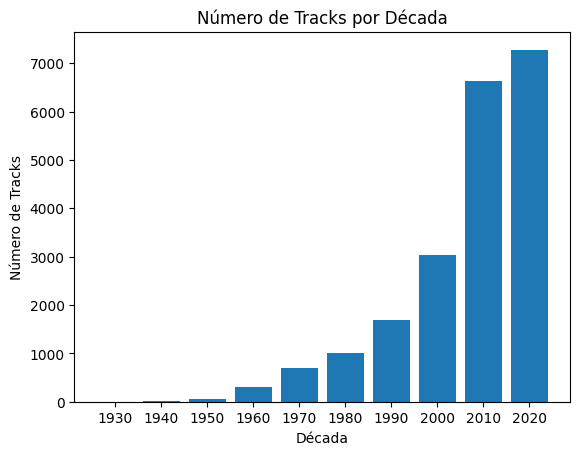

In [15]:
# Contar el número de tracks por década
tracks_por_decada = df['Decada'].value_counts().sort_index()

# Crear el histograma
plt.bar(tracks_por_decada.index, tracks_por_decada.values, width=8)  # width ajusta el ancho de las barras
plt.xlabel('Década')
plt.ylabel('Número de Tracks')
plt.title('Número de Tracks por Década')
plt.xticks(tracks_por_decada.index)  # Mostrar las décadas en el eje X
plt.show()

In [16]:
df.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID', 'Year', 'Decada'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          20718 non-null  int64         
 1   Acousticness      20716 non-null  float64       
 2   Album             20718 non-null  object        
 3   Album_type        20718 non-null  object        
 4   Artist            20718 non-null  object        
 5   Channel           20248 non-null  object        
 6   Comments          20149 non-null  float64       
 7   Danceability      20716 non-null  float64       
 8   Date              20718 non-null  datetime64[ns]
 9   Duration_ms       20716 non-null  float64       
 10  Energy            20716 non-null  float64       
 11  Instrumentalness  20716 non-null  float64       
 12  Key               20716 non-null  float64       
 13  Licensed          20248 non-null  float64       
 14  Likes             2017

In [18]:
# Eliminar filas con valores nulos en las columnas necesarias
df_final = df.dropna()

df_final.info()



<class 'pandas.core.frame.DataFrame'>
Index: 19549 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Track_Id          19549 non-null  int64         
 1   Acousticness      19549 non-null  float64       
 2   Album             19549 non-null  object        
 3   Album_type        19549 non-null  object        
 4   Artist            19549 non-null  object        
 5   Channel           19549 non-null  object        
 6   Comments          19549 non-null  float64       
 7   Danceability      19549 non-null  float64       
 8   Date              19549 non-null  datetime64[ns]
 9   Duration_ms       19549 non-null  float64       
 10  Energy            19549 non-null  float64       
 11  Instrumentalness  19549 non-null  float64       
 12  Key               19549 non-null  float64       
 13  Licensed          19549 non-null  float64       
 14  Likes             19549 non

In [19]:
df_final.columns

Index(['Track_Id', 'Acousticness', 'Album', 'Album_type', 'Artist', 'Channel',
       'Comments', 'Danceability', 'Date', 'Duration_ms', 'Energy',
       'Instrumentalness', 'Key', 'Licensed', 'Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Title', 'Track', 'Valence', 'Views',
       'official_video', 'Artist_ID', 'Year', 'Decada'],
      dtype='object')

In [20]:
df_final.Stream

0        1.040235e+09
1        3.100837e+08
2        6.306347e+07
3        4.346636e+08
4        6.172597e+08
             ...     
20713    9.227144e+06
20714    1.089818e+07
20715    6.226110e+06
20716    6.873961e+06
20717    5.695584e+06
Name: Stream, Length: 19549, dtype: float64

In [21]:
df_final = df_final.drop(columns=['Track_Id','Channel','Comments', 'Artist_ID','Comments'])

Vamos a averiguar si hay canciones repetidas

In [22]:
duplicados = df_final['Track'].duplicated().sum()
canciones_duplicadas = df_final[df_final['Track'].duplicated()]
canciones_duplicadas[['Track','Artist']]

Track          Artist
141                                                 Numb          Khalid
155                                      DON'T YOU WORRY         Shakira
248                                ay! (feat. Lil Wayne)       Lil Wayne
296                                       Pump It Louder          Tiësto
312                                        Numb / Encore           JAY-Z
...                                                  ...             ...
20637  Playground (from the series Arcane League of L...          Arcane
20672                                        Que Vuelvas  Grupo Frontera
20673                                          Bebe Dame  Grupo Frontera
20675                                      911 - En Vivo  Grupo Frontera
20679                                               Vete  Grupo Frontera

[2683 rows x 2 columns]

In [23]:
conteo_canciones = df_final['Track'].value_counts()
canciones_repetidas = conteo_canciones[conteo_canciones > 1]
print(canciones_repetidas)

Track
El Ultimo Adiós - Varios Artistas Version                     23
Color Esperanza 2020                                          19
Resistiré                                                     14
Heaven                                                         9
52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)     9
                                                              ..
The Boys                                                       2
Quien TV Remix                                                 2
The Imperial March (Darth Vader's Theme)                       2
Beautiful Mistakes (feat. Megan Thee Stallion)                 2
Kiss Me                                                        2
Name: count, Length: 1985, dtype: int64


In [24]:
print(f"Número de canciones repetidas: {duplicados}")

Número de canciones repetidas: 2683


Vamos a dejar el dataframe con canciones unicas, por lo tanto se van a eliminar las repetidas y se dejará la que tenga más reproducciones dentro de estas. Se va a dejar el track que tenga más reproducciones(stream)

In [25]:
df_final = df_final.loc[df_final.groupby('Track')['Stream'].idxmax()]

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16866 entries, 1517 to 13212
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Acousticness      16866 non-null  float64       
 1   Album             16866 non-null  object        
 2   Album_type        16866 non-null  object        
 3   Artist            16866 non-null  object        
 4   Danceability      16866 non-null  float64       
 5   Date              16866 non-null  datetime64[ns]
 6   Duration_ms       16866 non-null  float64       
 7   Energy            16866 non-null  float64       
 8   Instrumentalness  16866 non-null  float64       
 9   Key               16866 non-null  float64       
 10  Licensed          16866 non-null  float64       
 11  Likes             16866 non-null  float64       
 12  Liveness          16866 non-null  float64       
 13  Loudness          16866 non-null  float64       
 14  Speechiness       16866 

Compración de reproducciones de Spotify vs Youtube

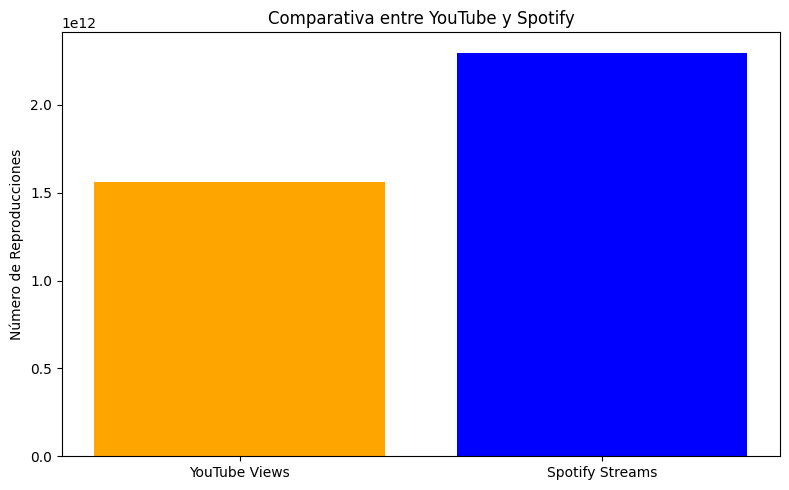

In [26]:
Views_youtube=df_final.Views.sum()
Stream_spotify=df_final.Stream.sum()


# Etiquetas y valores
labels = ['YouTube Views', 'Spotify Streams']
values = [Views_youtube, Stream_spotify]

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['orange', 'blue'])

# Personalización del gráfico
plt.ylabel('Número de Reproducciones')
plt.title('Comparativa entre YouTube y Spotify')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

10 Canciones más reproducidas en Spotify

In [27]:
top_10_canciones = df_final.sort_values(by='Stream', ascending=False).head(10)
top_10_canciones[['Track','Artist','Stream']]

Track           Artist  \
15250                                Blinding Lights       The Weeknd   
12452                                   Shape of You       Ed Sheeran   
19186                              Someone You Loved    Lewis Capaldi   
17937                     rockstar (feat. 21 Savage)      Post Malone   
17445  Sunflower - Spider-Man: Into the Spider-Verse         Swae Lee   
13503                                      One Dance            Drake   
16028                                         Closer           Halsey   
14030                                       Believer  Imagine Dragons   
14069                      STAY (with Justin Bieber)    Justin Bieber   
17288                                       Señorita     Shawn Mendes   

             Stream  
15250  3.386520e+09  
12452  3.362005e+09  
19186  2.634013e+09  
17937  2.594927e+09  
17445  2.538330e+09  
13503  2.522432e+09  
16028  2.456205e+09  
14030  2.369272e+09  
14069  2.365778e+09  
17288  2.336220e+09

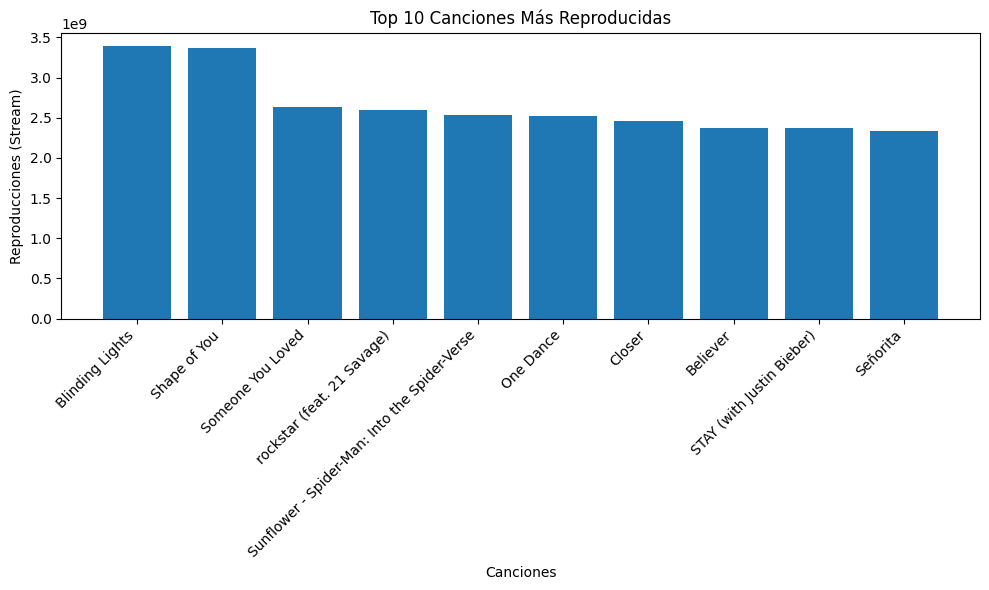

In [28]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_canciones['Track'], top_10_canciones['Stream'])
plt.xlabel('Canciones')
plt.ylabel('Reproducciones (Stream)')
plt.title('Top 10 Canciones Más Reproducidas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas de las canciones
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


10 canciones más reproducidas en Youtube

In [29]:
top_10_canciones = df_final.sort_values(by='Views', ascending=False).head(10)
top_10_canciones[['Track','Artist','Views']]

Track         Artist         Views
365                             Despacito   Daddy Yankee  8.079647e+09
12452                        Shape of You     Ed Sheeran  5.908398e+09
12469  See You Again (feat. Charlie Puth)    Wiz Khalifa  5.773797e+09
20303                   Wheels on the Bus      CoComelon  4.898831e+09
10686      Uptown Funk (feat. Bruno Mars)    Mark Ronson  4.821016e+09
8937                Gangnam Style (강남스타일)            PSY  4.679767e+09
9569                                Sugar       Maroon 5  3.817733e+09
13032                                Roar     Katy Perry  3.725749e+09
13040                      Counting Stars    OneRepublic  3.721610e+09
14074                               Sorry  Justin Bieber  3.627306e+09

/tmp/ipykernel_495433/3395167530.py:8: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_495433/3395167530.py:8: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_495433/3395167530.py:8: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_495433/3395167530.py:8: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/tmp/ipykernel_495433/3395167530.py:8: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
/home/jjmoras/pyprojects/ambientes/spoty_

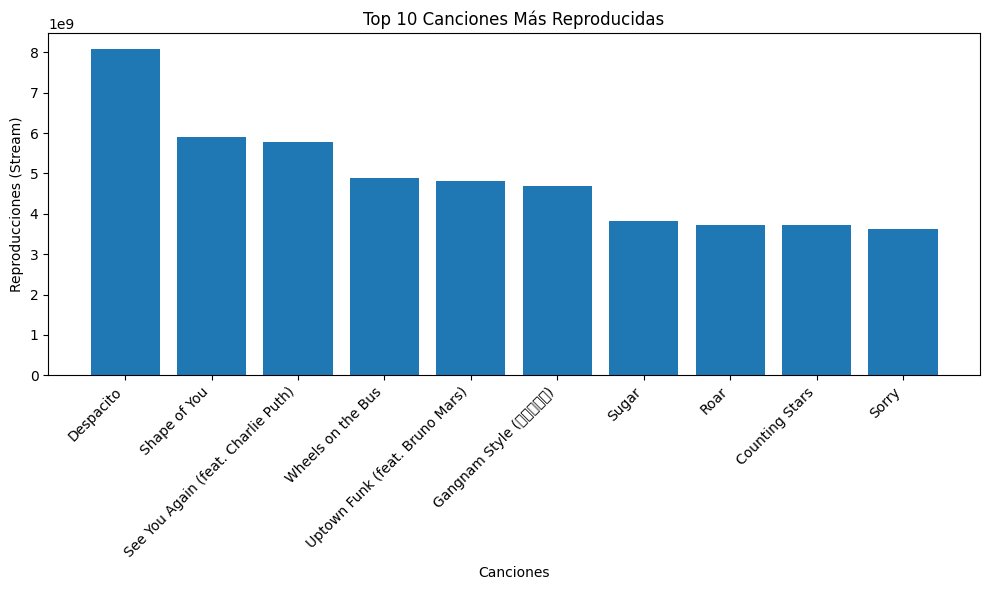

In [30]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10_canciones['Track'], top_10_canciones['Views'])
plt.xlabel('Canciones')
plt.ylabel('Reproducciones (Stream)')
plt.title('Top 10 Canciones Más Reproducidas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas de las canciones
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()

In [31]:
import numpy as np

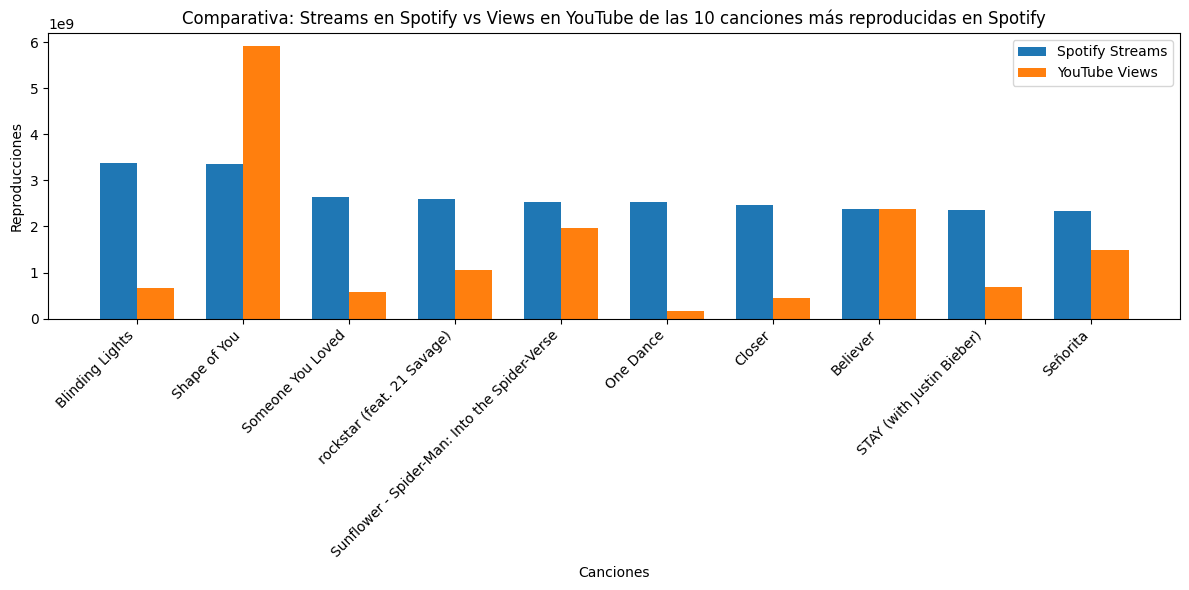

In [32]:
# Seleccionar datos relevantes
comparativa = df_final[['Track', 'Stream', 'Views']].nlargest(10, 'Stream')

# Configurar el gráfico
x = np.arange(len(comparativa['Track']))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(12, 6))

# Barras para Spotify
plt.bar(x - width/2, comparativa['Stream'], width, label='Spotify Streams')

# Barras para YouTube
plt.bar(x + width/2, comparativa['Views'], width, label='YouTube Views')

# Personalización
plt.xlabel('Canciones')
plt.ylabel('Reproducciones')
plt.title('Comparativa: Streams en Spotify vs Views en YouTube de las 10 canciones más reproducidas en Spotify')
plt.xticks(x, comparativa['Track'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

/tmp/ipykernel_495433/1487045520.py:22: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_495433/1487045520.py:22: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_495433/1487045520.py:22: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_495433/1487045520.py:22: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_495433/1487045520.py:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/jjmoras/pyprojects/ambientes/spoty_youtube/spoty/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jjmoras/pyprojects/am

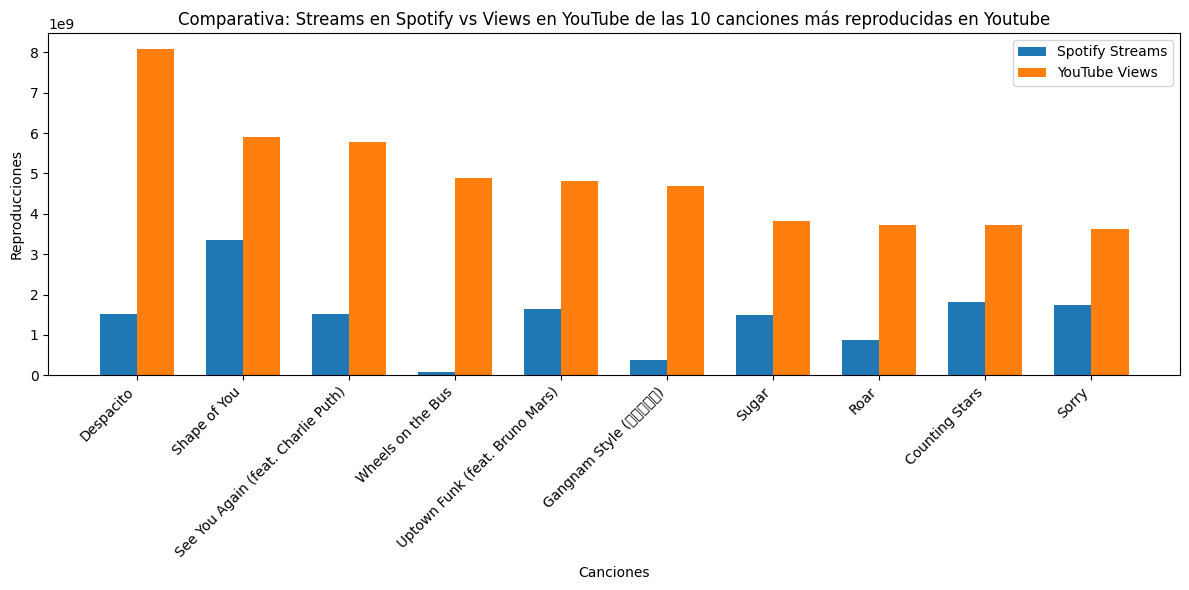

In [33]:
# Seleccionar datos relevantes
comparativa = df_final[['Track', 'Stream', 'Views']].nlargest(10, 'Views')

# Configurar el gráfico
x = np.arange(len(comparativa['Track']))  # Posiciones en el eje X
width = 0.35  # Ancho de las barras

plt.figure(figsize=(12, 6))

# Barras para Spotify
plt.bar(x - width/2, comparativa['Stream'], width, label='Spotify Streams')

# Barras para YouTube
plt.bar(x + width/2, comparativa['Views'], width, label='YouTube Views')

# Personalización
plt.xlabel('Canciones')
plt.ylabel('Reproducciones')
plt.title('Comparativa: Streams en Spotify vs Views en YouTube de las 10 canciones más reproducidas en Youtube')
plt.xticks(x, comparativa['Track'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

Hay una disparidad entre las canciones que se escuchan en Youtube con las reproducciones en spotify

Vamos a unir el df_final con el data frame de artistas para hacer el análisis desde el punto de vista del genero

In [34]:
df_final = df_final.merge(df_artistas, on='Artist', how='left')
df_final['Genero'] = df_final['Genero'].fillna("Desconocido")

In [35]:
df_final.Genero

0              italian hip hop, italian pop, trap italiana
1                                                         
2        ambient, braindance, electronica, intelligent ...
3                           jam band, neo mellow, pop rock
4                        argentine hip hop, trap argentino
                               ...                        
16861                                        j-pop, j-rock
16862                                                k-pop
16863                                    k-pop, korean r&b
16864                              k-pop, k-pop girl group
16865                                    k-pop, korean r&b
Name: Genero, Length: 16866, dtype: object

Para hacer un mejor análisis por genero vamos a crear un df donde los géneros no estén agrupados en una sola celda y  cada canción se repite para cada género del artista.

In [36]:
df_final.columns

Index(['Acousticness', 'Album', 'Album_type', 'Artist', 'Danceability', 'Date',
       'Duration_ms', 'Energy', 'Instrumentalness', 'Key', 'Licensed', 'Likes',
       'Liveness', 'Loudness', 'Speechiness', 'Stream', 'Tempo', 'Title',
       'Track', 'Valence', 'Views', 'official_video', 'Year', 'Decada',
       'Genero'],
      dtype='object')

In [37]:
df_generos = df_final.assign(Genero=df_final['Genero'].str.split(', ')).explode('Genero')

df_generos[['Genero','Track']]

Genero                     Track
0       italian hip hop          !ly (feat. Coez)
0           italian pop          !ly (feat. Coez)
0         trap italiana          !ly (feat. Coez)
1                        #1 - Colby O'Donis Remix
2               ambient                        #3
...                 ...                       ...
16863        korean r&b  눈,코,입 (Eyes, Nose, Lips)
16864             k-pop   러시안 룰렛 Russian Roulette
16864  k-pop girl group   러시안 룰렛 Russian Roulette
16865             k-pop        링가링가 (RINGA LINGA)
16865        korean r&b        링가링가 (RINGA LINGA)

[58352 rows x 2 columns]

10 Géneros más escuchados en Spotify

In [38]:
streams_por_genero = df_generos.groupby('Genero')['Stream'].sum().sort_values(ascending=False)
streams_por_genero.head(10)

Genero
pop              6.351652e+11
rock             3.193197e+11
rap              3.052912e+11
dance pop        2.049185e+11
hip hop          1.784163e+11
modern rock      1.404857e+11
pop rap          1.298817e+11
urbano latino    1.272582e+11
classic rock     1.189156e+11
trap             1.140800e+11
Name: Stream, dtype: float64

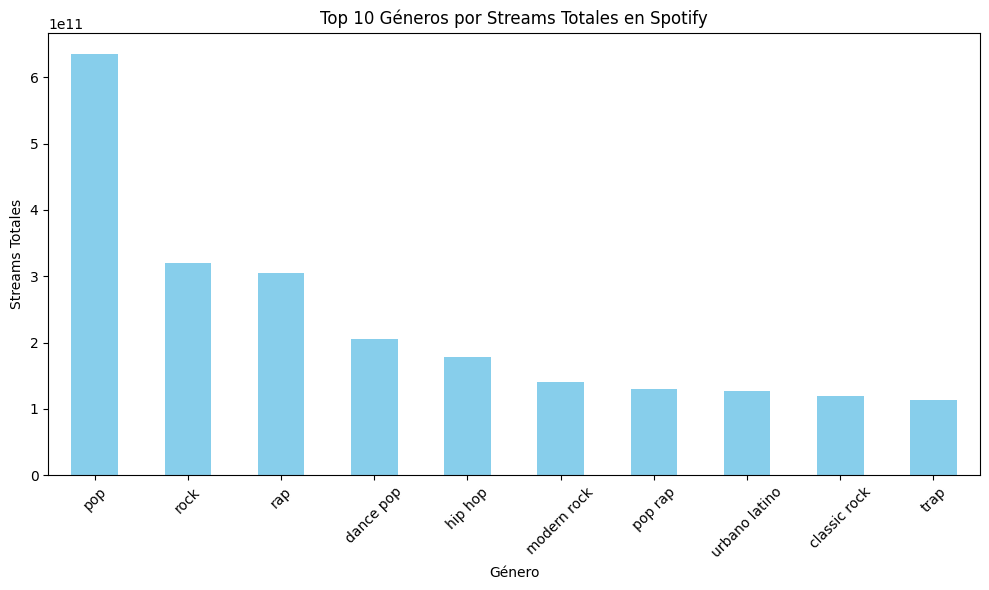

In [39]:

# Top 10 géneros por streams e
top_generos = streams_por_genero.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros por Streams Totales en Spotify')
plt.xlabel('Género')
plt.ylabel('Streams Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
Views_por_genero = df_generos.groupby('Genero')['Views'].sum().sort_values(ascending=False)
Views_por_genero.head(10)

Genero
pop              4.609450e+11
dance pop        1.836881e+11
urbano latino    1.453556e+11
rap              1.435134e+11
rock             1.423982e+11
latin pop        1.320440e+11
reggaeton        1.238199e+11
trap latino      1.102993e+11
pop rap          9.315175e+10
hip hop          8.769757e+10
Name: Views, dtype: float64

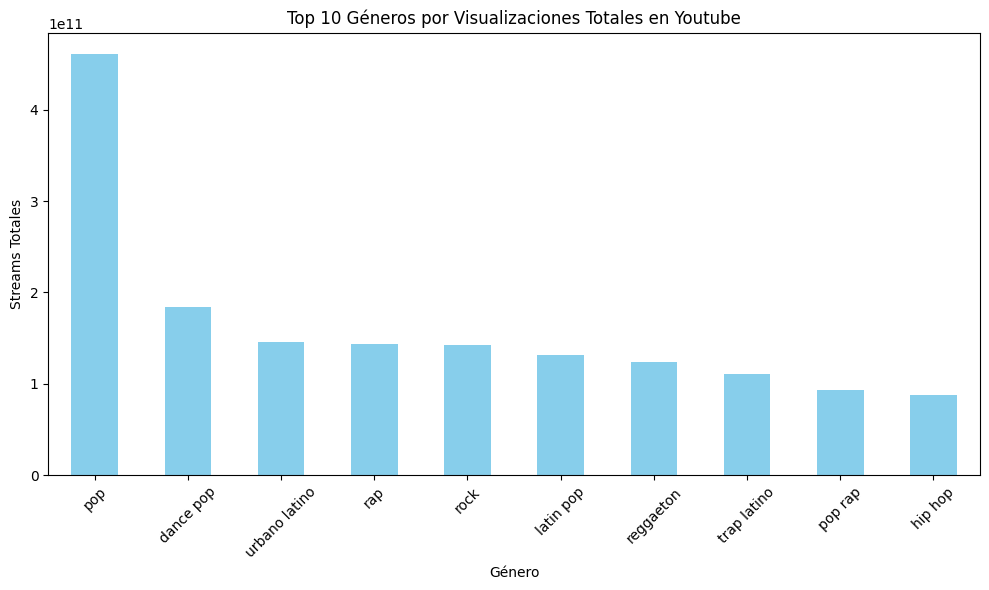

In [41]:
# Top 10 géneros por Views
top_generos = Views_por_genero.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_generos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros por Visualizaciones Totales en Youtube')
plt.xlabel('Género')
plt.ylabel('Streams Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En youtube hay más consumo de músuca urbaba y latina mientras que en spotify hay más consumo de pop y rock

In [42]:
# Agrupar por década y género, y sumar los streams
generos_decada = df_generos.groupby(['Decada', 'Genero'])['Stream'].sum().reset_index()

# Ordenar los resultados por década y streams
generos_decada = generos_decada.sort_values(by=['Decada', 'Stream'], ascending=[True, False])

In [43]:
# Obtener los Top 5 géneros más escuchados por década
top_generos_decada = generos_decada.groupby('Decada').head(5)

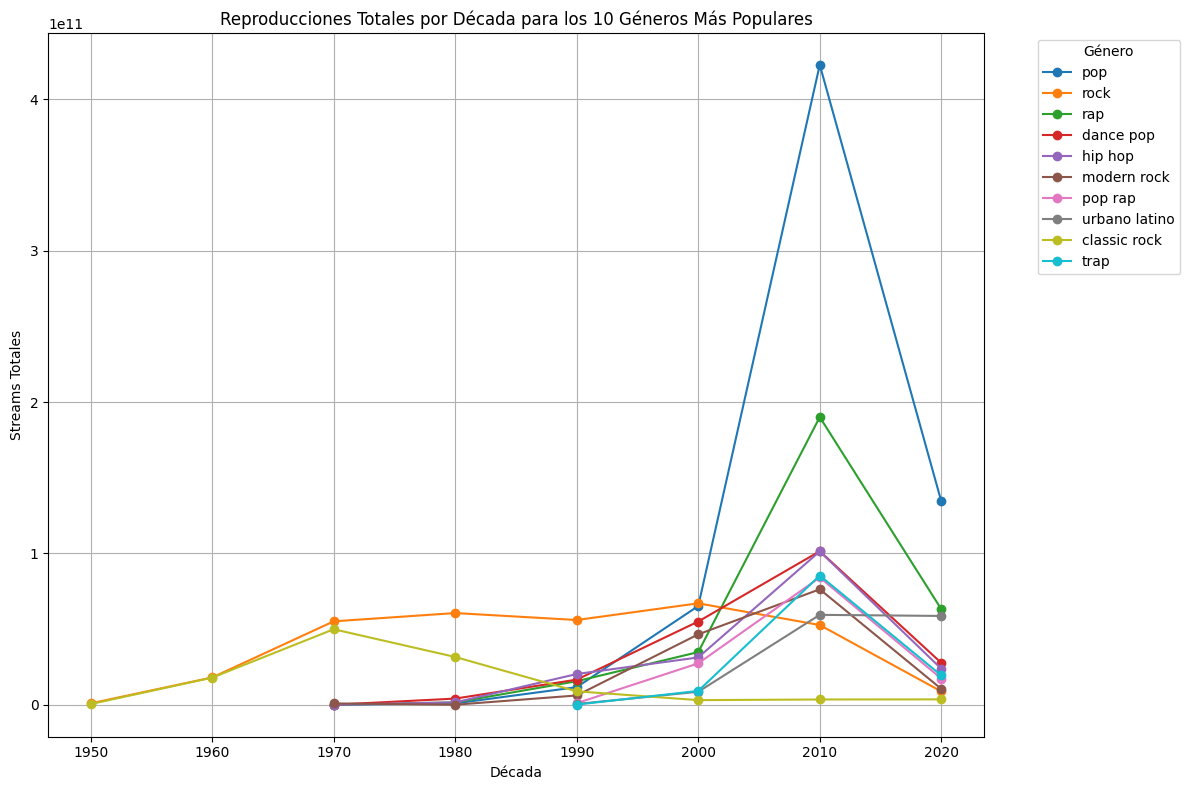

In [44]:
# Sumar streams totales por género
generos_populares = df_generos.groupby('Genero')['Stream'].sum().nlargest(10).index

# Filtrar los datos para incluir solo los 10 géneros más populares
df_top_generos = df_generos[df_generos['Genero'].isin(generos_populares)]

# Sumar streams por década y género
streams_decada_genero = df_top_generos.groupby(['Decada', 'Genero'])['Stream'].sum().reset_index()



plt.figure(figsize=(12, 8))

# Crear una línea para cada género
for genero in generos_populares:
    datos_genero = streams_decada_genero[streams_decada_genero['Genero'] == genero]
    plt.plot(
        datos_genero['Decada'], 
        datos_genero['Stream'], 
        marker='o', 
        label=genero
    )

# Personalizar el gráfico
plt.title('Reproducciones Totales por Década para los 10 Géneros Más Populares')
plt.xlabel('Década')
plt.ylabel('Streams Totales')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

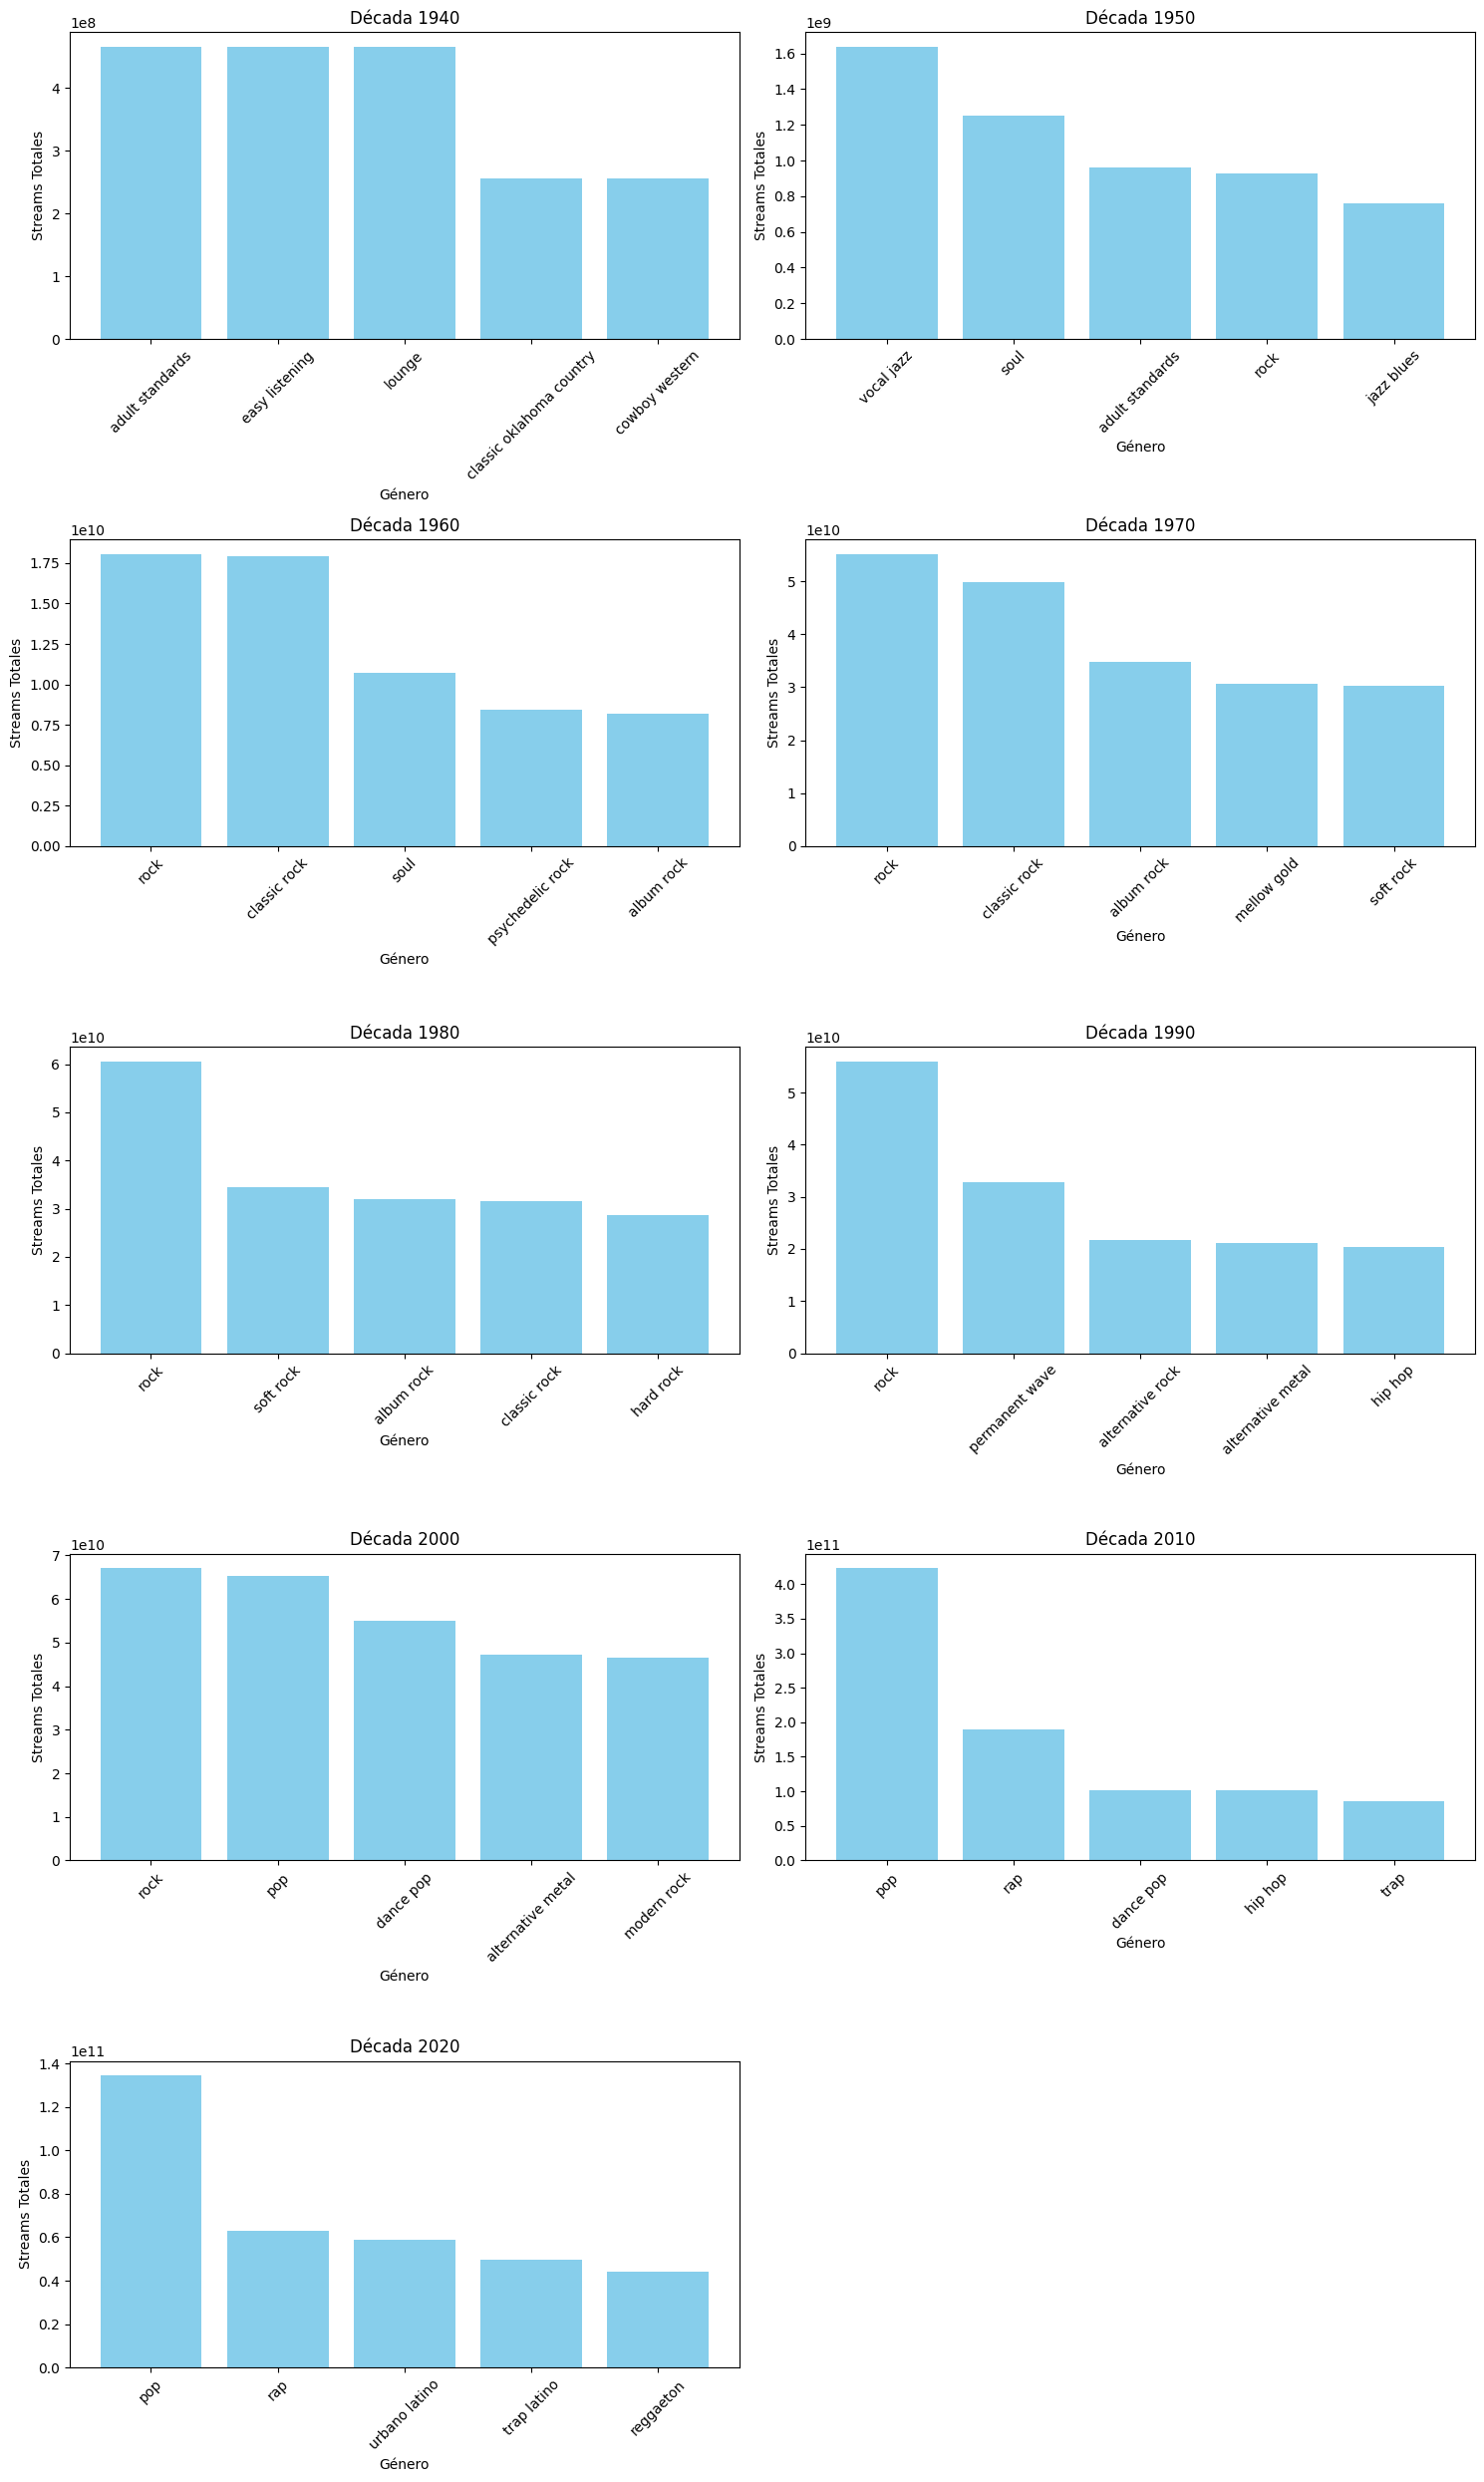

In [45]:

# Listar las décadas únicas
decadas = top_generos_decada['Decada'].unique()

# Configurar el tamaño de la figura
n_rows = -(-len(decadas) // 2)  # Calcula el número de filas necesarias (redondeo hacia arriba)
plt.figure(figsize=(15, n_rows * 5))

# Crear un gráfico para cada década
for i, decada in enumerate(decadas):
    plt.subplot(n_rows, 2, i + 1)  # Subgráfico en una cuadrícula de 2 columnas
    datos_decada = top_generos_decada[top_generos_decada['Decada'] == decada]
    plt.bar(datos_decada['Genero'], datos_decada['Stream'], color='skyblue')
    plt.title(f'Década {decada}')
    plt.xlabel('Género')
    plt.ylabel('Streams Totales')
    plt.xticks(rotation=45)

# Ajustar el diseño
plt.tight_layout()
plt.show()


## Evaluación por caracteristicas sonoras
Vamos a evaluar como se comportan las cualidades sonoras de las canciones. Para esto vamos a crear un df donde solo se encuentren dichas cualidades

In [46]:

#creamos una nueva columna de duración en minutos
df_final['Duration_min']=df_final['Duration_ms']/60000

In [47]:
df_caracteristicas=df_final[['Acousticness','Danceability', 'Date', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key','Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Valence', 'Views',
        'Year', 'Decada']]

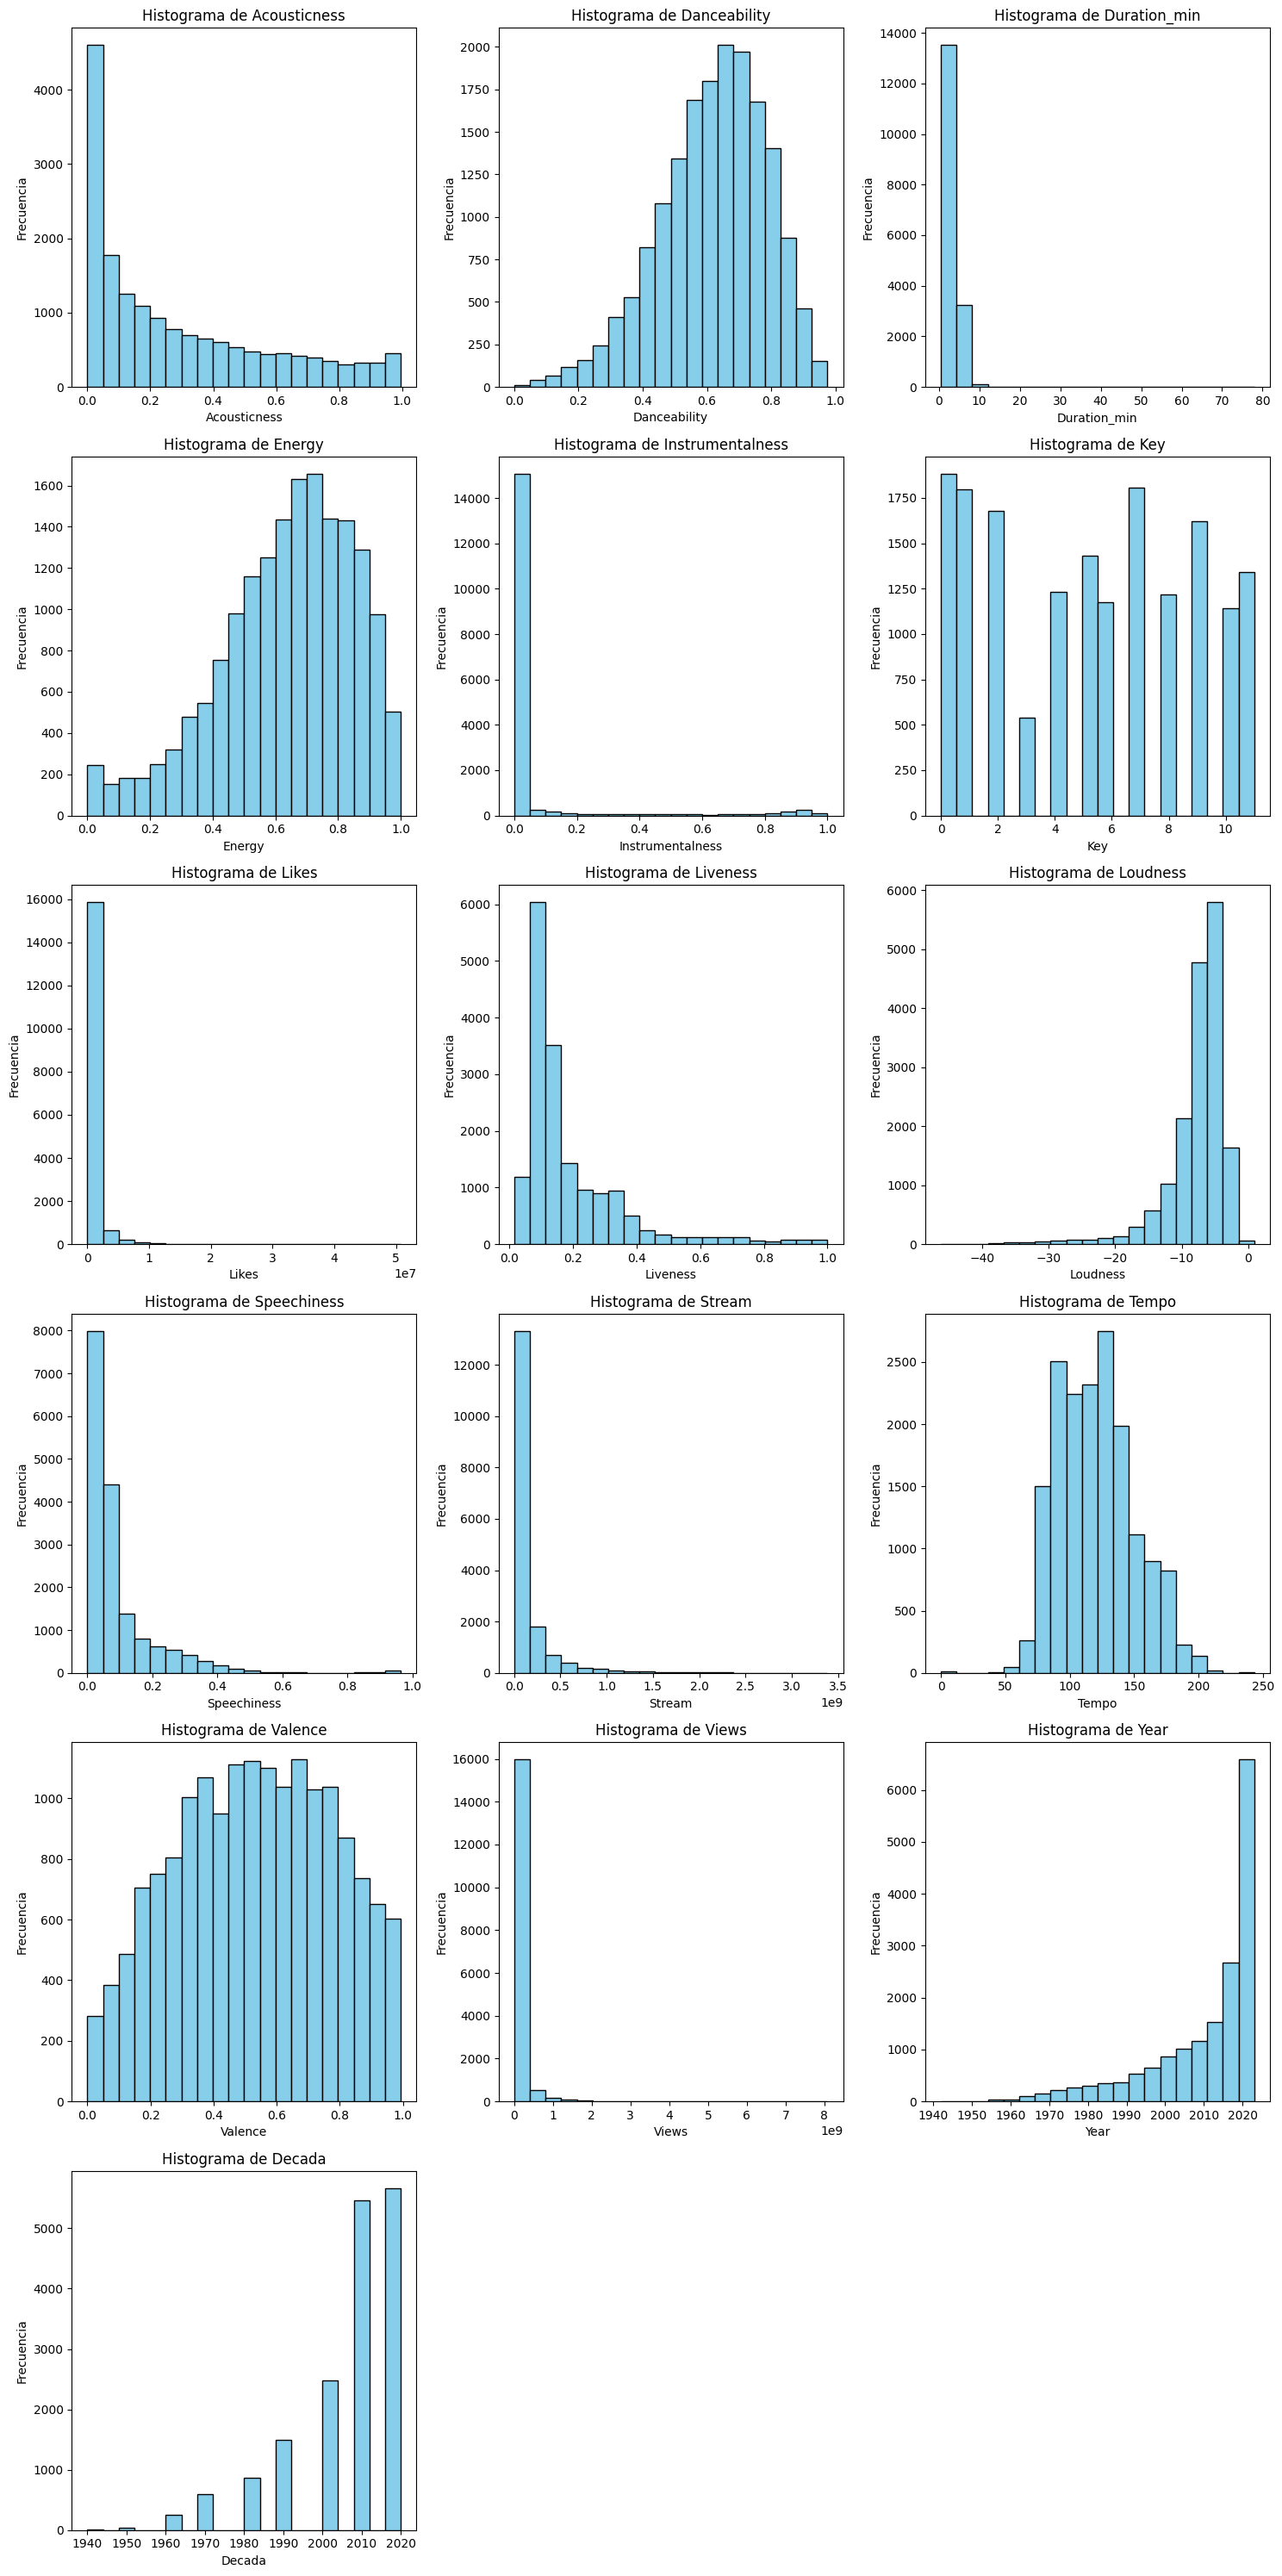

In [48]:

# Filtrar las columnas numéricas
df_caracteristicas_numericas = df_caracteristicas.select_dtypes(include=['number'])

# Configurar la figura para los histogramas
num_columnas = len(df_caracteristicas_numericas.columns)
num_filas = (num_columnas + 2) // 3  # Calcula el número de filas para una cuadrícula de 3 columnas
plt.figure(figsize=(15, num_filas * 5))

# Crear un histograma para cada columna numérica
for i, columna in enumerate(df_caracteristicas_numericas.columns):
    plt.subplot(num_filas, 3, i + 1)  # Configurar subgráficos con 3 columnas
    plt.hist(df_caracteristicas_numericas[columna].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

## Análisis de variable físiscas de las canciones

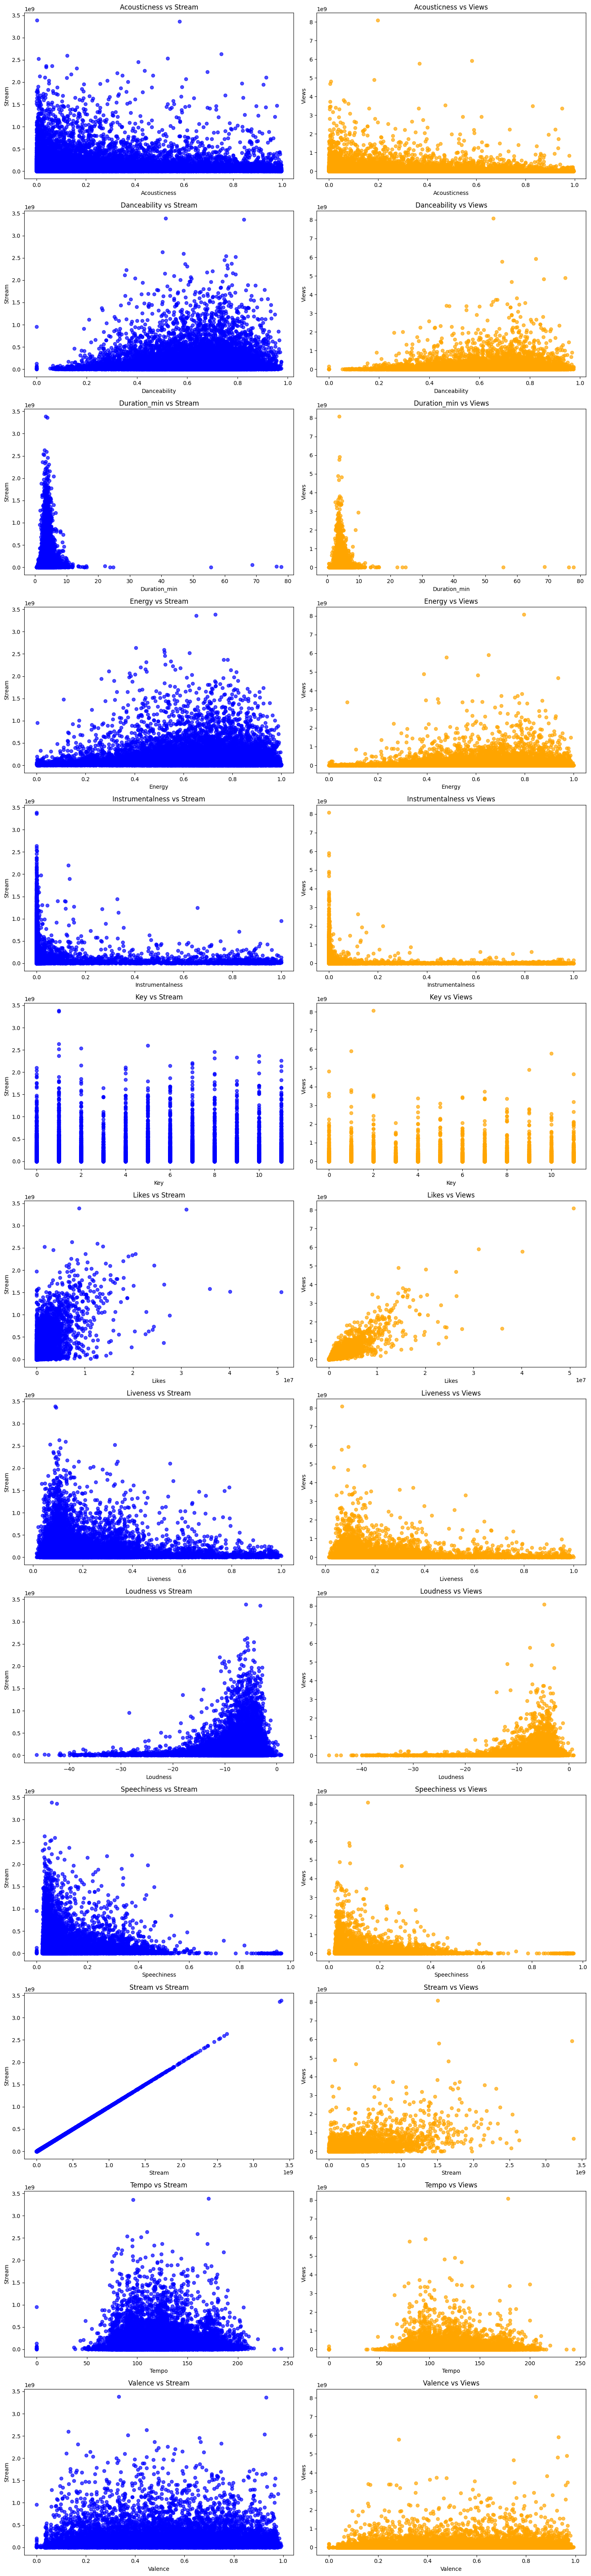

In [49]:
# Seleccionar las columnas numéricas para analizar
variables = ['Acousticness','Danceability', 'Duration_min', 'Energy',
       'Instrumentalness', 'Key','Likes', 'Liveness', 'Loudness',
       'Speechiness', 'Stream', 'Tempo', 'Valence',
        ]

# Configurar el tamaño de la figura
plt.figure(figsize=(15, len(variables) * 5))

# Graficar cada variable contra Stream
for i, var in enumerate(variables):
    plt.subplot(len(variables), 2, 2 * i + 1)
    plt.scatter(df_caracteristicas[var], df_caracteristicas['Stream'], alpha=0.7, color='blue')
    plt.title(f'{var} vs Stream')
    plt.xlabel(var)
    plt.ylabel('Stream')
    
    plt.subplot(len(variables), 2, 2 * i + 2)
    plt.scatter(df_caracteristicas[var], df_caracteristicas['Views'], alpha=0.7, color='orange')
    plt.title(f'{var} vs Views')
    plt.xlabel(var)
    plt.ylabel('Views')

# Ajustar diseño
plt.tight_layout()
plt.show()


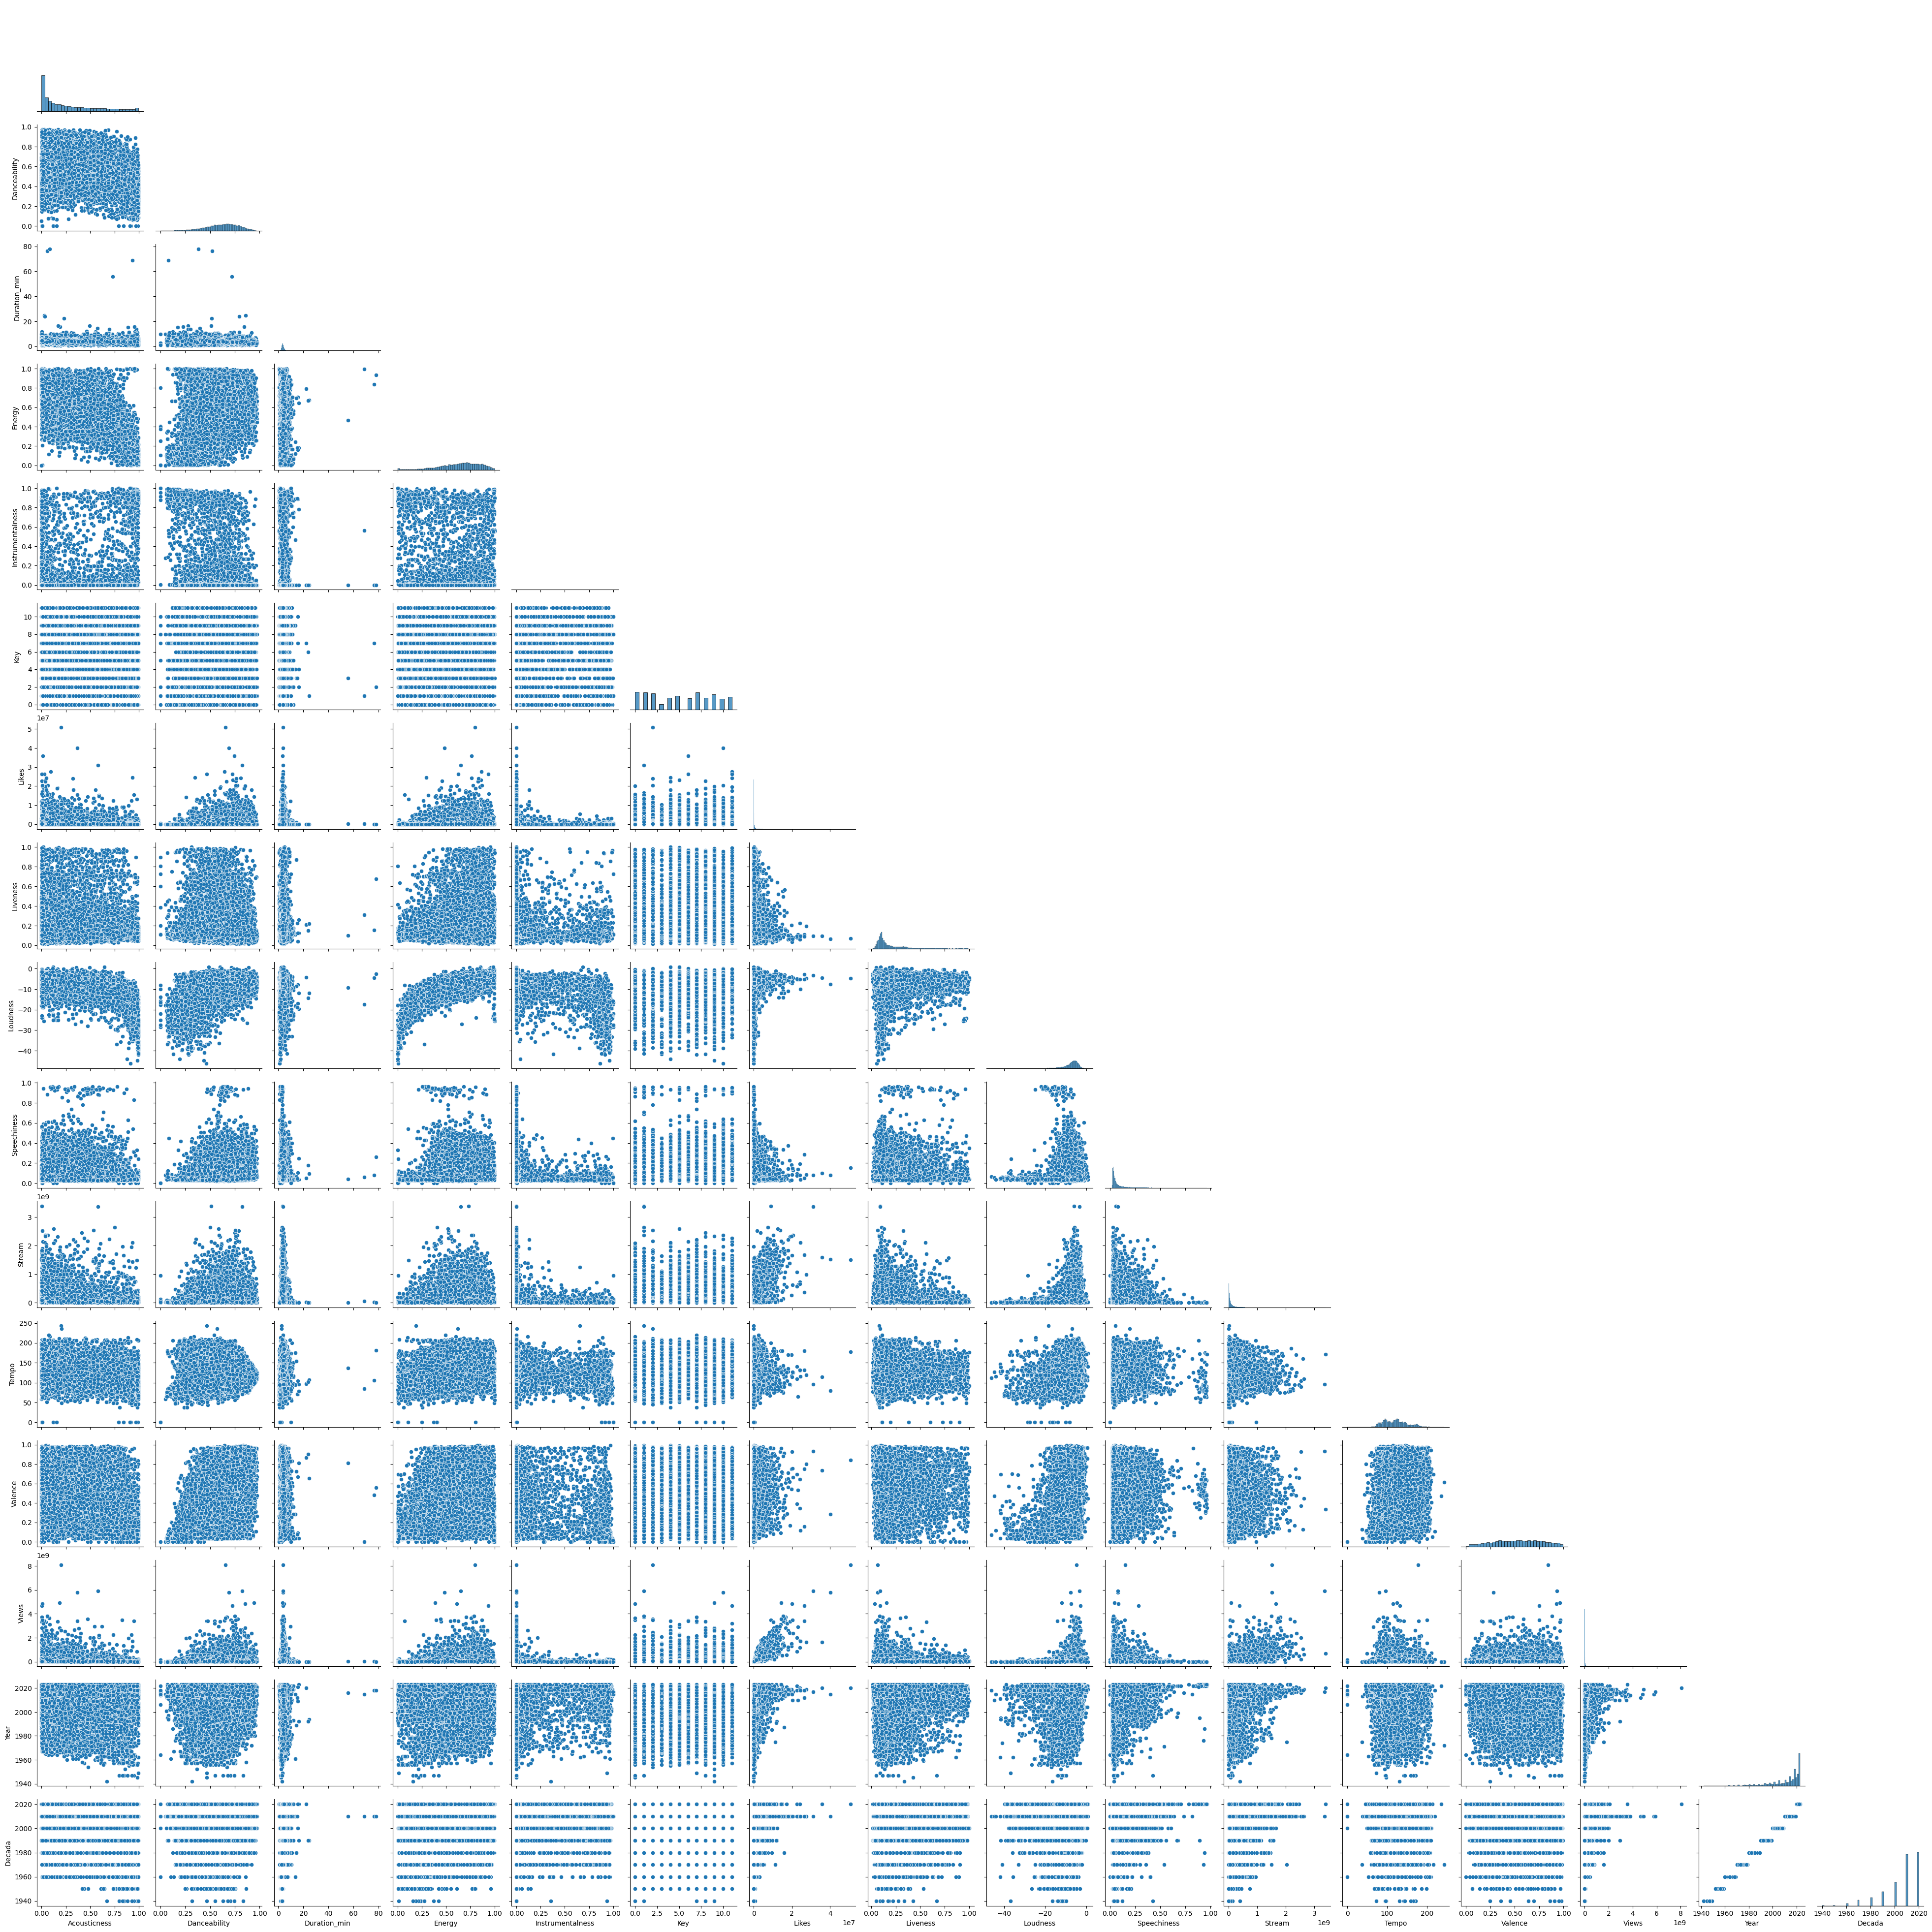

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas relevantes para el parplot
df_pairplot =df_caracteristicas
#df_pairplot = df_final[['Acousticness', 'Danceability', 'Energy', 'Likes', 'Stream', 'Valence']]

# Crear el pairplot
sns.pairplot(df_pairplot, diag_kind='hist', corner=True)

# Mostrar el gráfico
plt.show()

## Agrupación de Generos

In [51]:
df_generos['Rep_total']=df_generos['Views']+df_generos['Stream']

In [52]:
# Agrupar por 'Genero' y sumar las reproducciones
df_generos_agrupado = df_generos.groupby('Genero', as_index=False)['Rep_total'].sum()

# Ordenar por número de reproducciones (opcional)
df_generos_agrupado = df_generos_agrupado.sort_values(by='Rep_total', ascending=False)

# Mostrar el resultado
df_generos_agrupado.head(20)


Genero     Rep_total
760                 pop  1.096110e+12
859                rock  4.617178e+11
821                 rap  4.488046e+11
270           dance pop  3.886066e+11
1074      urbano latino  2.726137e+11
459             hip hop  2.661138e+11
576           latin pop  2.329171e+11
849           reggaeton  2.304016e+11
772             pop rap  2.230334e+11
1033        trap latino  2.135308e+11
643         modern rock  1.962943e+11
1022               trap  1.766063e+11
741      permanent wave  1.541794e+11
220        classic rock  1.521847e+11
1065             uk pop  1.325254e+11
22    alternative metal  1.309295e+11
762           pop dance  1.287429e+11
331                 edm  1.249940e+11
941           soft rock  1.224777e+11
815                 r&b  1.216488e+11

In [53]:
df_generos_agrupado.head(100)['Rep_total'].sum()/df_generos_agrupado['Rep_total'].sum()

np.float64(0.720118885573921)

In [54]:
# Agrupar por 'Genero' y sumar las reproducciones
df_generos_agrupado = df_generos.groupby('Genero', as_index=False)['Views'].sum()

# Ordenar por número de reproducciones (opcional)
df_generos_agrupado = df_generos_agrupado.sort_values(by='Views', ascending=False)

# Mostrar el resultado
df_generos_agrupado.head(20)

Genero         Views
760                pop  4.609450e+11
270          dance pop  1.836881e+11
1074     urbano latino  1.453556e+11
821                rap  1.435134e+11
859               rock  1.423982e+11
576          latin pop  1.320440e+11
849          reggaeton  1.238199e+11
1033       trap latino  1.102993e+11
772            pop rap  9.315175e+10
459            hip hop  8.769757e+10
360              filmi  7.473098e+10
1022              trap  6.252632e+10
636   modern bollywood  6.005207e+10
643        modern rock  5.580859e+10
1065            uk pop  5.216945e+10
293           desi pop  5.110557e+10
741     permanent wave  4.859801e+10
815                r&b  4.535908e+10
574      latin hip hop  4.535319e+10
331                edm  4.518023e+10

In [55]:
df

Track_Id  Acousticness                                          Album  \
0             0      0.008360                                     Demon Days   
1             1      0.086900                                  Plastic Beach   
2             2      0.042500  New Gold (feat. Tame Impala and Bootie Brown)   
3             3      0.000015                                  Plastic Beach   
4             4      0.025300                                       Gorillaz   
...         ...           ...                                            ...   
20713     20713      0.448000                           JUST DANCE HARDSTYLE   
20714     20714      0.028000                 SET FIRE TO THE RAIN HARDSTYLE   
20715     20715      0.024300                      OUTSIDE HARDSTYLE SPED UP   
20716     20716      0.356000                            ONLY GIRL HARDSTYLE   
20717     20717      0.002770                             MISS YOU HARDSTYLE   

      Album_type       Artist              Channel  Comments  Danceability  \
0          album     Gorillaz             Gorillaz  169907.0         0.818   
1          album     Gorillaz             Gorillaz   31003.0         0.676   
2         single     Gorillaz             Gorillaz    7399.0         0.695   
3          album     Gorillaz             Gorillaz   55229.0         0.689   
4          album     Gorillaz             Gorillaz  155930.0         0.663   
...          ...          ...                  ...       ...           ...   
20713     single  SICK LEGEND  SICK LEGEND - Topic       0.0         0.582   
20714     single  SICK LEGEND  SICK LEGEND - Topic       0.0         0.531   
20715     single  SICK LEGEND  SICK LEGEND - Topic       0.0         0.443   
20716     single  SICK LEGEND  SICK LEGEND - Topic       0.0         0.417   
20717     single  SICK LEGEND  SICK LEGEND - Topic       0.0         0.498   

            Date  Duration_ms  ...        Stream    Tempo  \
0     2005-05-23     222640.0  ...  1.040235e+09  138.559   
1     2010-03-03     200173.0  ...  3.100837e+08   92.761   
2     2022-08-31     215150.0  ...  6.306347e+07  108.014   
3     2010-03-03     233867.0  ...  4.346636e+08  120.423   
4     2001-01-01     340920.0  ...  6.172597e+08  167.953   
...          ...          ...  ...           ...      ...   
20713 2022-07-12      94667.0  ...  9.227144e+06   90.002   
20714 2022-07-11     150857.0  ...  1.089818e+07  174.869   
20715 2022-07-27     136842.0  ...  6.226110e+06  168.388   
20716 2022-08-01     108387.0  ...  6.873961e+06  155.378   
20717 2022-09-09     181500.0  ...  5.695584e+06  160.067   

                                                   Title  \
0             Gorillaz - Feel Good Inc. (Official Video)   
1      Gorillaz - Rhinestone Eyes [Storyboard Film] (...   
2      Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3         Gorillaz - On Melancholy Hill (Official Video)   
4             Gorillaz - Clint Eastwood (Official Video)   
...                                                  ...   
20713                               JUST DANCE HARDSTYLE   
20714                     SET FIRE TO THE RAIN HARDSTYLE   
20715                          OUTSIDE HARDSTYLE SPED UP   
20716                                ONLY GIRL HARDSTYLE   
20717                                 MISS YOU HARDSTYLE   

                                               Track  Valence        Views  \
0                                     Feel Good Inc.   0.7720  693555221.0   
1                                    Rhinestone Eyes   0.8520   72011645.0   
2      New Gold (feat. Tame Impala and Bootie Brown)   0.5510    8435055.0   
3                                 On Melancholy Hill   0.5780  211754952.0   
4                                     Clint Eastwood   0.5250  618480958.0   
...                                              ...      ...          ...   
20713                           JUST DANCE HARDSTYLE   0.6580      71678.0   
20714                 SET FIRE 

In [60]:


# Crear la matriz género-artista (One-Hot Encoding para géneros)
df_genre_matrix = df_generos.pivot_table(index='Artist', columns='Genero', aggfunc='size', fill_value=0)

# Crear la matriz de co-ocurrencia género vs género
df_genre_vs_genre = df_genre_matrix.T.dot(df_genre_matrix)

# Eliminar la diagonal (géneros no deben contarse consigo mismos)
for genre in df_genre_vs_genre.index:
    df_genre_vs_genre.loc[genre, genre] = 0

# Mostrar la matriz
df_genre_vs_genre


Genero               a cappella  abstract hip hop  acid rock  acoustic cover  \
Genero                                                                         
                  0           0                 0          0               0   
a cappella        0           0                 0          0               0   
abstract hip hop  0           0                 0          0               0   
acid rock         0           0                 0          0               0   
acoustic cover    0           0                 0          0               0   
...              ..         ...               ...        ...             ...   
wu fam            0           0                 0          0               0   
yacht rock        0           0                 0          0               0   
yodeling          0           0                 0          0               0   
zhongguo feng     0           0                 0          0               0   
zolo              0           0                 0          0               0   

Genero            acoustic opm  acoustic pop  adult standards  aesthetic rap  \
Genero                                                                         
                             0             0                0              0   
a cappella                   0             0                0              0   
abstract hip hop             0             0                0              0   
acid rock                    0             0                0              0   
acoustic cover               0             0                0              0   
...                        ...           ...              ...            ...   
wu fam                       0             0                0              0   
yacht rock                   0             0              100              0   
yodeling                     0             0                0              0   
zhongguo feng                0             0                0              0   
zolo                         0             0                0              0   

Genero            afghan pop  ...  world  world worship  worship  wrestling  \
Genero                        ...                                             
                           0  ...      0              0        0          0   
a cappella                 0  ...      0              0        0          0   
abstract hip hop           0  ...      0              0        0          0   
acid rock                  0  ...      0              0        0          0   
acoustic cover             0  ...      0              0        0          0   
...                      ...  ...    ...            ...      ...        ...   
wu fam                     0  ...      0              0        0          0   
yacht rock                 0  ...      0              0        0          0   
yodeling                   0  ...      0              0        0          0   
zhongguo feng              0  ...      0              0        0          0   
zolo                       0  ...      0              0        0          0   

Genero            writing  wu fam  yacht rock  yodeling  zhongguo feng  zolo  
Genero                                                                        
                        0       0           0         0              0     0  
a cappella              0       0           0         0              0     0  
abstract hip hop        0       0           0         0              0     0  
acid rock               0       0           0         0              0     0  
acoustic cover          0       0           0         0              0     0  
...                   ...     ...         ...       ...            ...   ...  
wu fam                  0       0           0         0              0     0  
yacht rock              0       0           0         0              0     0  
yodeling                0       0           0         0              0     0  
zhongguo feng        

In [62]:
df_genre_vs_genre[df_genre_vs_genre['rock']>0]['rock'].sort_values(ascending=False)

Genero
classic rock        5982
album rock          5200
hard rock           4785
permanent wave      3393
soft rock           3279
                    ... 
neo mellow            49
german metal          25
german hard rock      25
german rock           25
uk doom metal          4
Name: rock, Length: 157, dtype: int64

/tmp/ipykernel_495433/900636569.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(df_genre_vs_genre, method='ward')


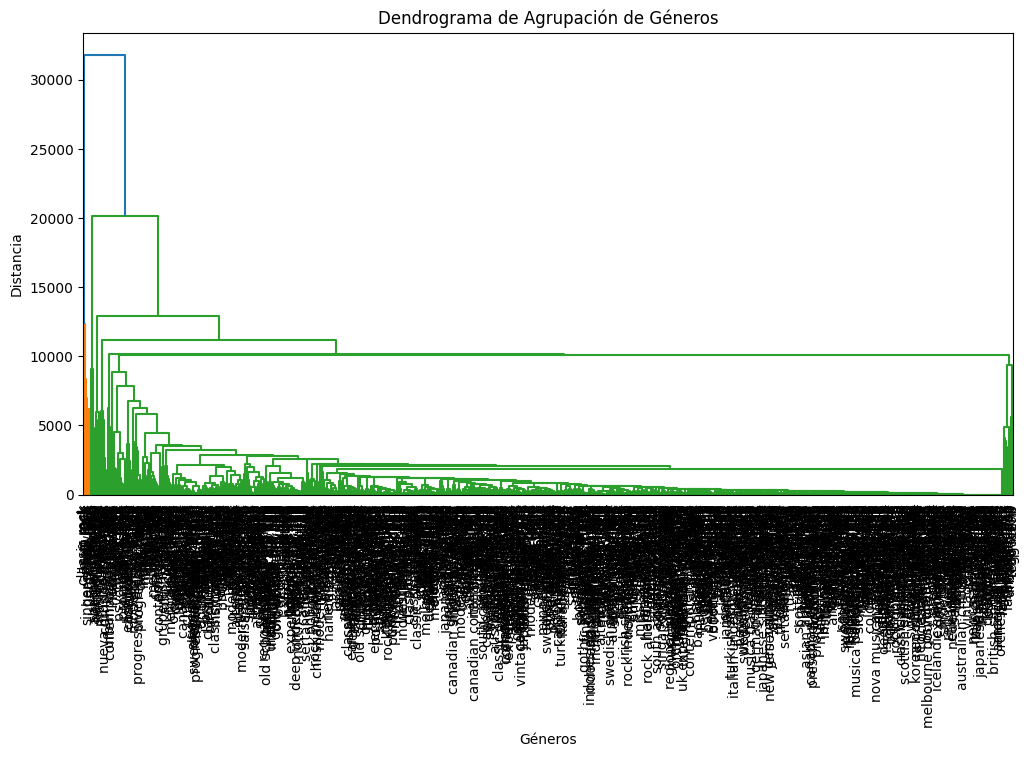

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Crear un modelo de clustering jerárquico
linkage_matrix = linkage(df_genre_vs_genre, method='ward')

# Dibujar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df_genre_vs_genre.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Agrupación de Géneros")
plt.xlabel("Géneros")
plt.ylabel("Distancia")
plt.show()


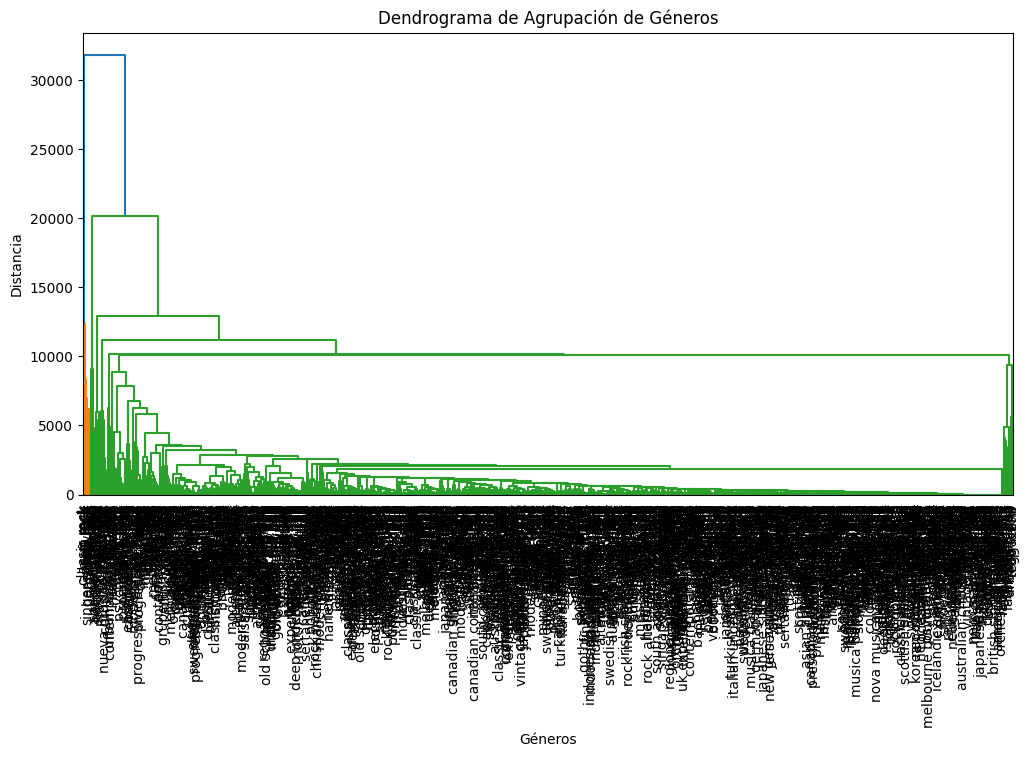

Genero            Cluster
Genero                   
                       11
a cappella             11
abstract hip hop       11
acid rock              11
acoustic cover         11
...                   ...
wu fam                 11
yacht rock             10
yodeling               11
zhongguo feng          11
zolo                   11

[1113 rows x 1 columns]


In [82]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Crear la matriz de linkage (usando método 'ward' para clustering jerárquico)
linkage_matrix = linkage(df_genre_vs_genre, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df_genre_vs_genre.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma de Agrupación de Géneros")
plt.xlabel("Géneros")
plt.ylabel("Distancia")
plt.show()

# Reducir los grupos: definir un umbral de distancia para cortar el dendrograma
threshold = 7000  # Ajusta este valor para crear menos o más grupos
clusters = fcluster(linkage_matrix, t=threshold, criterion='distance')

# Agregar los clusters al DataFrame
df_genre_vs_genre['Cluster'] = clusters

# Mostrar los géneros con sus clusters
print(df_genre_vs_genre[['Cluster']])


In [83]:
df_genre_vs_genre['Cluster'].unique()

array([11,  1,  6, 12, 10,  7,  2,  9,  8,  4,  5, 13,  3], dtype=int32)

In [84]:
df_genre_vs_genre[df_genre_vs_genre['Cluster']==7]

Genero                    a cappella  abstract hip hop  acid rock  \
Genero                                                              
banda                  0           0                 0          0   
corrido                0           0                 0          0   
corridos tumbados      0           0                 0          0   
musica mexicana        0           0                 0          0   
norteno                0           0                 0          0   
nueva musica mexicana  0           0                 0          0   
sad sierreno           0           0                 0          0   
sierreno               0           0                 0          0   

Genero                 acoustic cover  acoustic opm  acoustic pop  \
Genero                                                              
banda                               0             0             0   
corrido                             0             0             0   
corridos tumbados                   0             0             0   
musica mexicana                     0             0             0   
norteno                             0             0             0   
nueva musica mexicana               0             0             0   
sad sierreno                        0             0             0   
sierreno                            0             0             0   

Genero                 adult standards  aesthetic rap  afghan pop  ...  \
Genero                                                             ...   
banda                                0              0           0  ...   
corrido                              0              0           0  ...   
corridos tumbados                    0              0           0  ...   
musica mexicana                      0              0           0  ...   
norteno                              0              0           0  ...   
nueva musica mexicana                0              0           0  ...   
sad sierreno                         0              0           0  ...   
sierreno                             0              0           0  ...   

Genero                 world worship  worship  wrestling  writing  wu fam  \
Genero                                                                      
banda                              0        0          0        0       0   
corrido                            0        0          0        0       0   
corridos tumbados                  0        0          0        0       0   
musica mexicana                    0        0          0        0       0   
norteno                            0        0          0        0       0   
nueva musica mexicana              0        0          0        0       0   
sad sierreno                       0        0          0        0       0   
sierreno                           0        0          0        0       0   

Genero                 yacht rock  yodeling  zhongguo feng  zolo  Cluster  
Genero                                                                     
banda                           0         0              0     0        7  
corrido                         0         0              0     0        7  
corridos tumbados               0         0              0     0        7  
musica mexicana                 0         0              0     0        7  
norteno                         0         0              0     0        7  
nueva musica mexicana           0         0              0     0        7  
sad sierreno                    0         0              0     0        7  
sierreno                        0         0              0     0        7  

[8 rows x 1114 columns]

In [85]:
# Filtrar los géneros que pertenecen al cluster 7
generos_cluster_7 = df_genre_vs_genre[df_genre_vs_genre['Cluster'] == 7]

# Mostrar los géneros correspondientes
generos_cluster_7.index


Index(['banda', 'corrido', 'corridos tumbados', 'musica mexicana', 'norteno',
       'nueva musica mexicana', 'sad sierreno', 'sierreno'],
      dtype='object', name='Genero')

In [86]:
# Convertir a lista de géneros
lista_generos_cluster_7 = generos_cluster_7.index.tolist()
print(lista_generos_cluster_7)


['banda', 'corrido', 'corridos tumbados', 'musica mexicana', 'norteno', 'nueva musica mexicana', 'sad sierreno', 'sierreno']


In [87]:
cluster=df_genre_vs_genre['Cluster'].unique()

In [88]:
for i in cluster:
    generos_cluster = df_genre_vs_genre[df_genre_vs_genre['Cluster'] == i]
    lista_generos_cluster = generos_cluster.index.tolist()
    print(f'Lista de Generos Cluster {i}')
    print(lista_generos_cluster)


    
    


Lista de Generos Cluster 11
['', 'a cappella', 'abstract hip hop', 'acid rock', 'acoustic cover', 'acoustic opm', 'acoustic pop', 'adult standards', 'aesthetic rap', 'afghan pop', 'african rock', 'afro r&b', 'afrobeats', 'afrofuturism', 'afropop', 'agronejo', 'alabama rap', 'alt z', 'alte', 'alternative dance', 'alternative hip hop', 'alternative pop rock', 'alternative r&b', 'ambient', 'ambient folk', 'ambient pop', 'ambient worship', 'american folk revival', 'american metalcore', 'anadolu rock', 'anime', 'anime lo-fi', 'anime rock', 'anime score', 'anthem worship', 'arabesk', 'argentine ambient', 'argentine hip hop', 'argentine indie', 'argentine reggae', 'argentine telepop', 'arkansas country', 'arrocha', 'arrochadeira', 'art pop', 'art punk', 'asian american hip hop', 'athens indie', 'atl hip hop', 'atl trap', 'aussietronica', "australian children's music", 'australian country', 'australian dance', 'australian electropop', 'australian hip hop', 'australian indie', 'australian indie

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


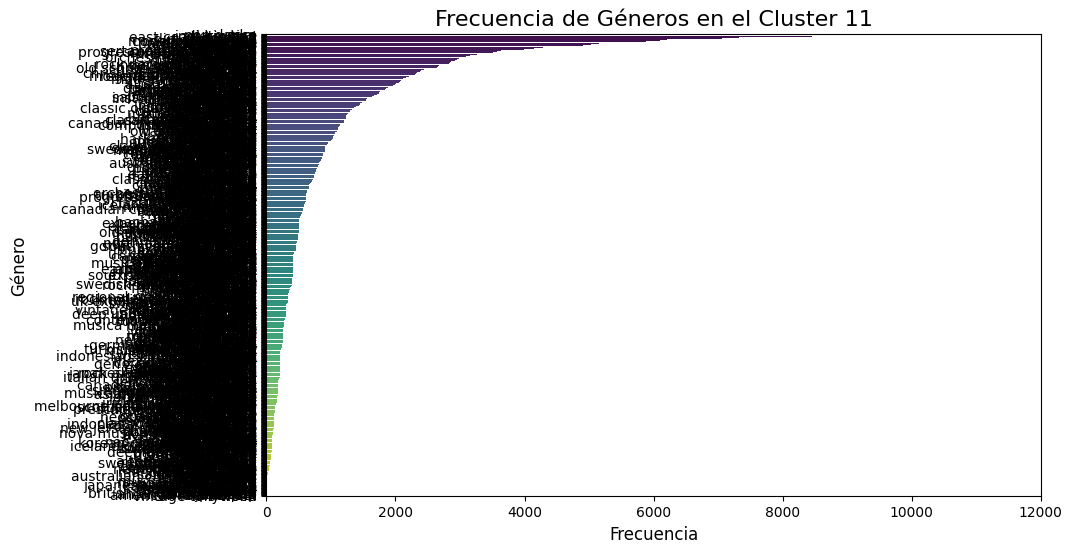

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


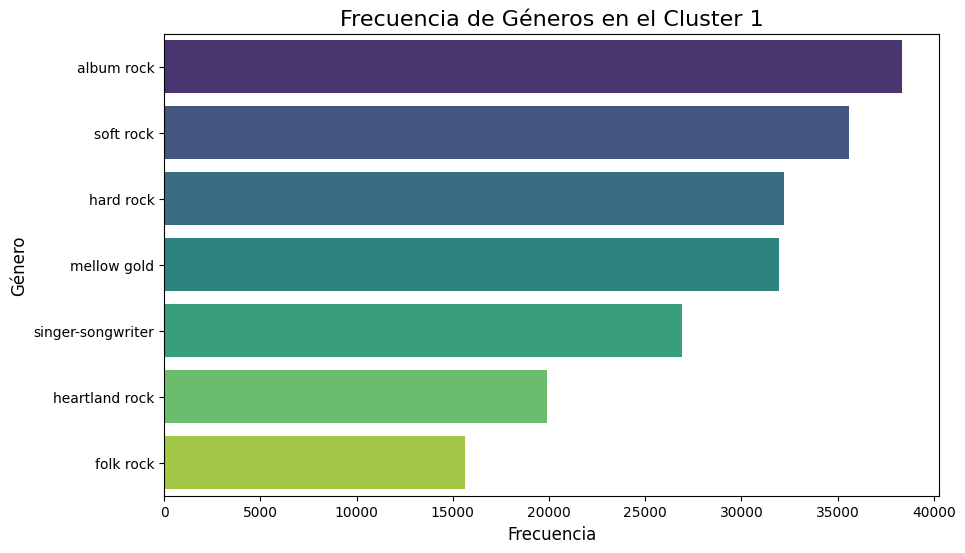

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


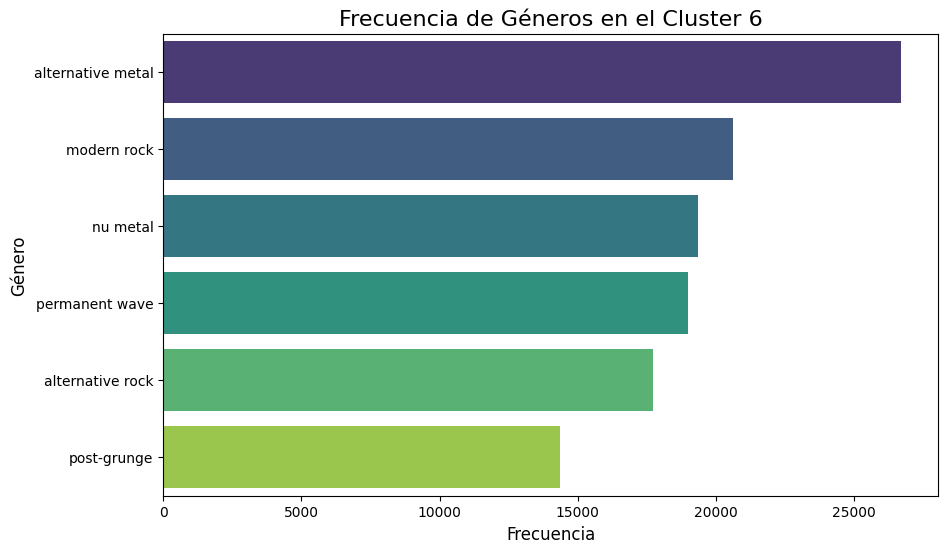

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


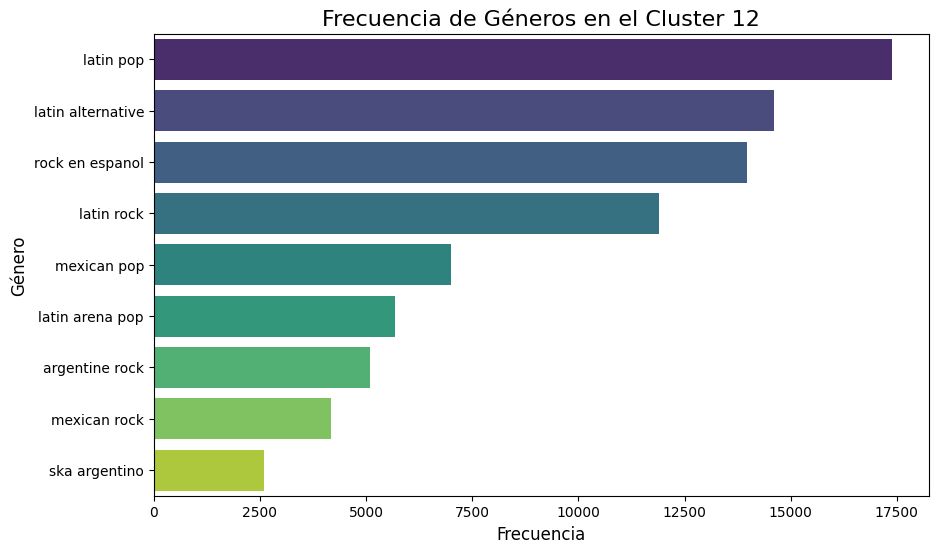

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


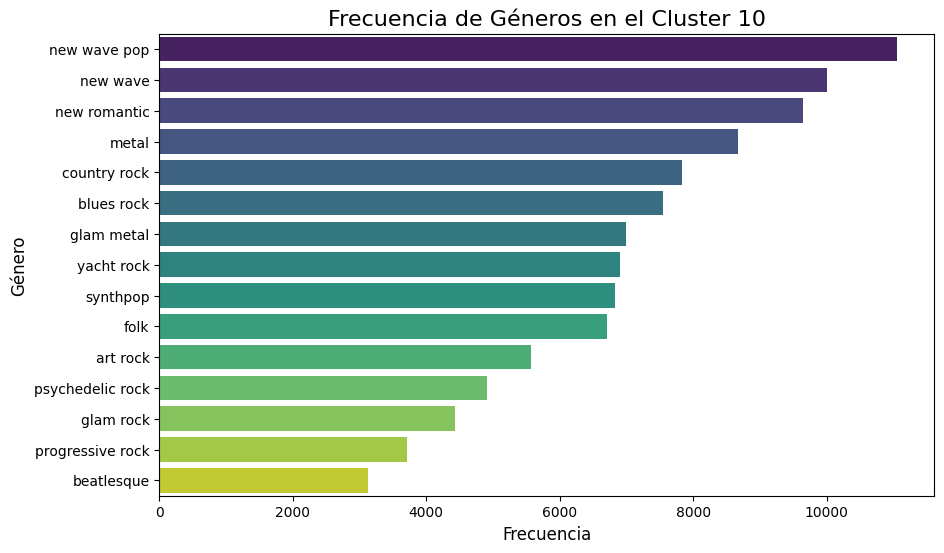

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


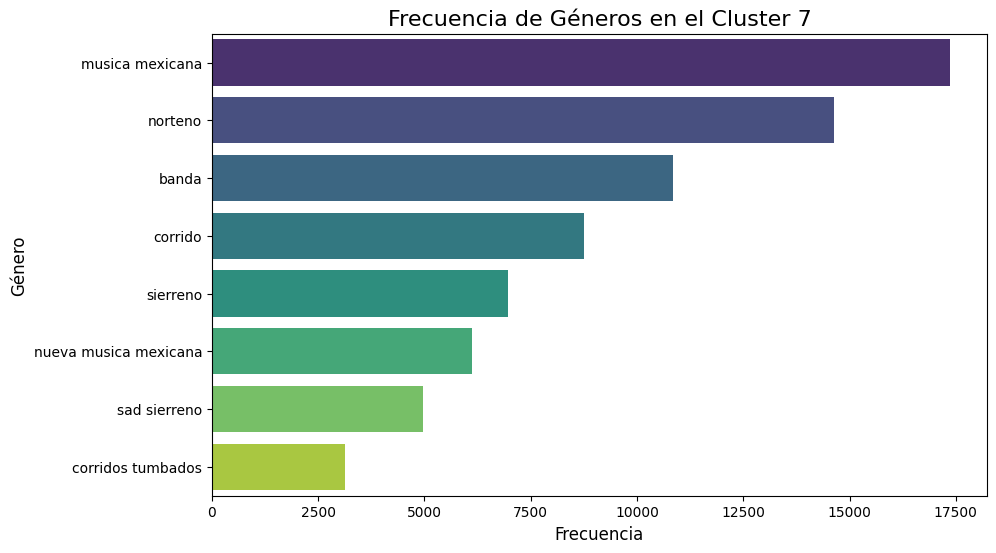

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


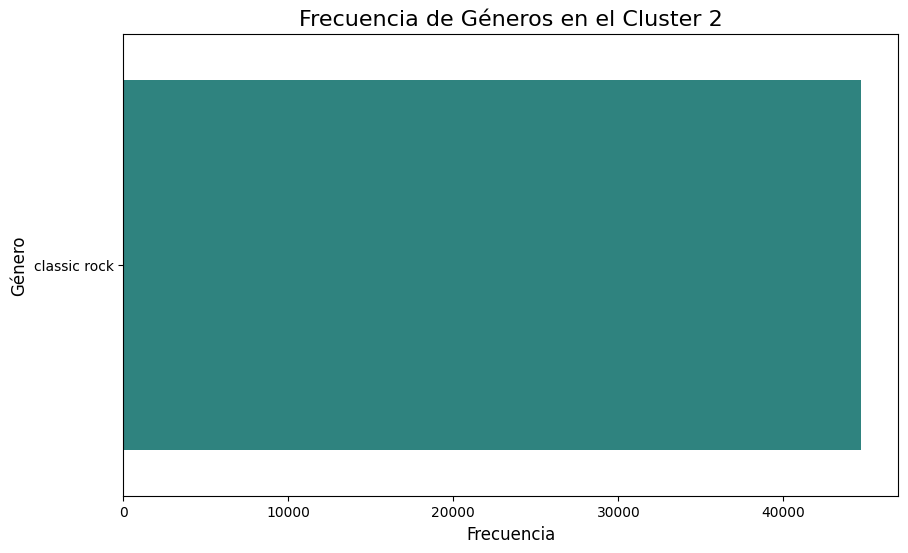

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


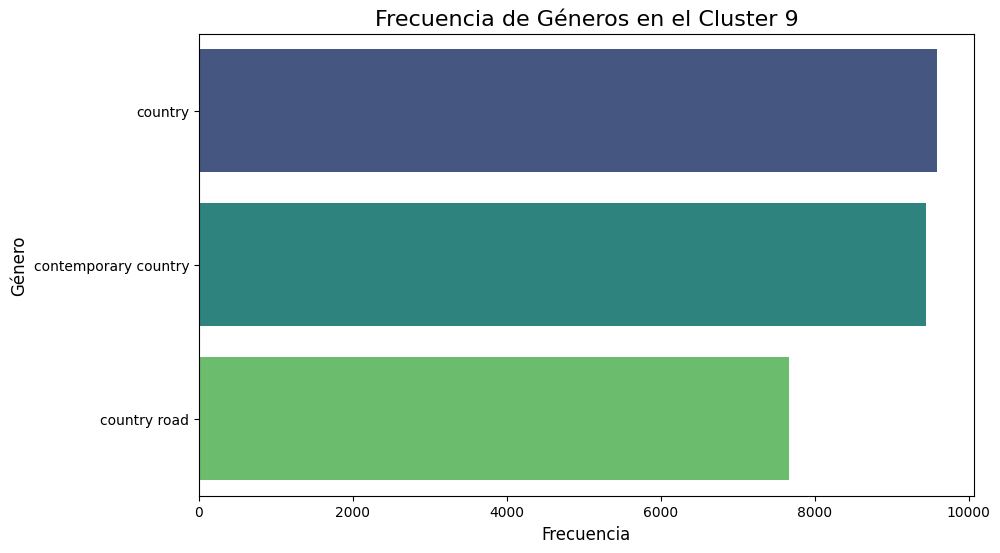

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


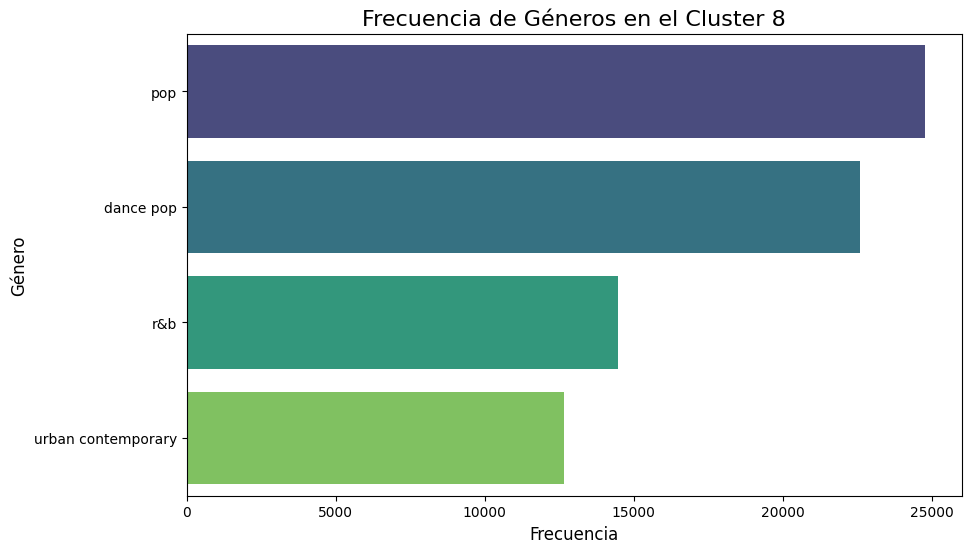

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


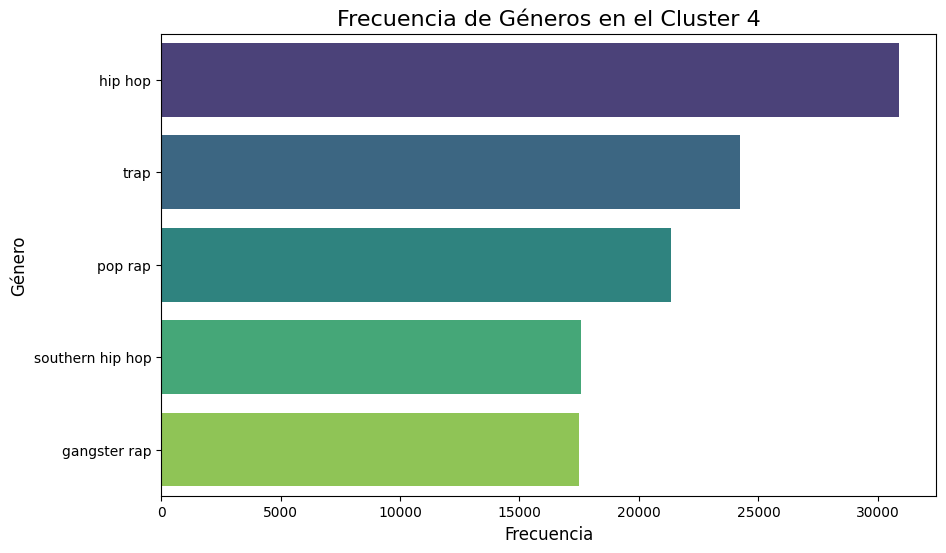

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


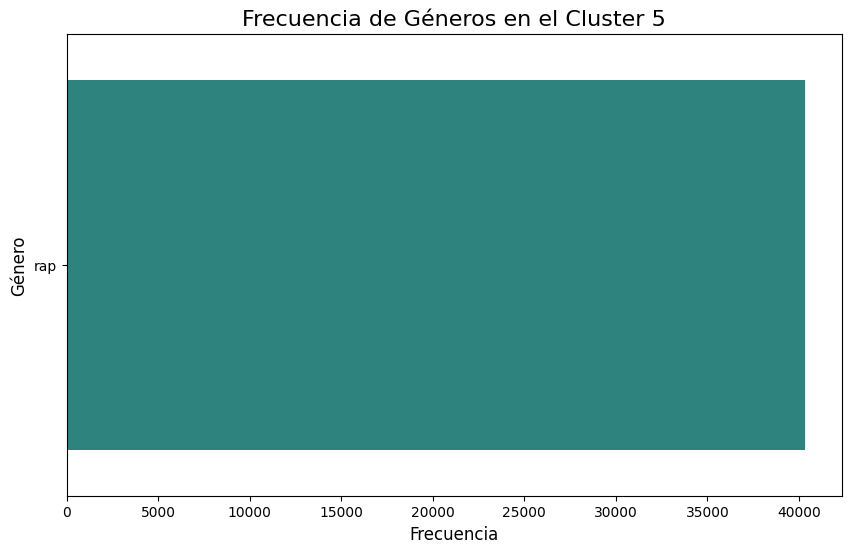

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


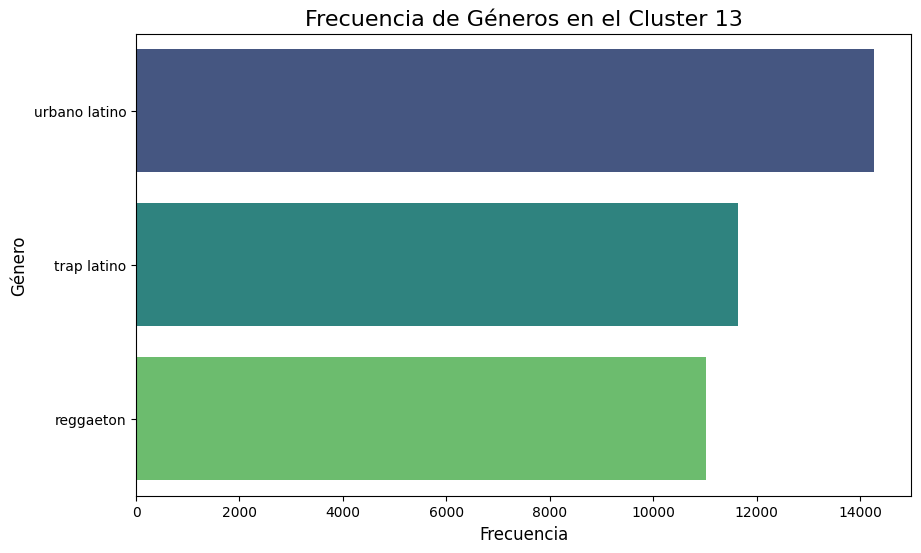

/tmp/ipykernel_495433/3372668994.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')


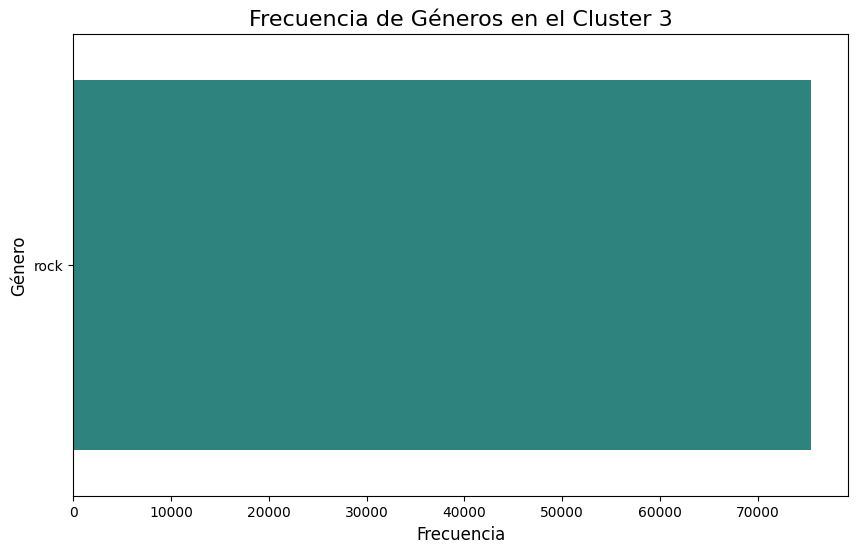

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in cluster:  # Asumiendo que tienes clusters del 0 al 13
    generos_cluster = df_genre_vs_genre[df_genre_vs_genre['Cluster'] == i]
    lista_generos_cluster = generos_cluster.index.tolist()
    
    # Contar la frecuencia de cada género en el cluster
    frecuencias = generos_cluster.sum(axis=1).sort_values(ascending=False)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frecuencias.values, y=frecuencias.index, palette='viridis')
    plt.title(f'Frecuencia de Géneros en el Cluster {i}', fontsize=16)
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('Género', fontsize=12)
    plt.show()